<a href="https://colab.research.google.com/github/ahkhaniki/spark-machine-learning/blob/main/BigData_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Engineering and Big Data Analysis**

---

- Course: Big Data
- Topic: Final Project
- Type: Data Engineering and Analysis
- Author(s): Amir Hussein Khaniki, Fariba Azizian
- URL: https://github.com/ahkhaniki/spark-machine-learning

---

# **Introduction**


Realtime text and semantic analysis involves using natural language processing and machine learning techniques to identify and categorize the emotions, opinions, and topics expressed in web-content. This can help businesses, marketers, politicians, and researchers understand the voice of the customer, monitor brand reputation, track trends, and analyze public opinion.

Twitter is a popular social media platform that allows users to share their thoughts and opinions with the world. Many public figures, such as politicians, celebrities, and influencers, use Twitter to communicate with their followers and post updates about their lives and views. Twitter is also a source of information and news, as various organizations, institutions, and governments use it to announce their events, plans, or products.

Analyzing Twitter content can reveal valuable insights into people's sentiments and perspectives on various topics or products. This can help address social issues, design better solutions, and improve policies.


## **Problem Statement**


An infrastructure must be built that can scrape and process web data. For this purpose, Apache Spark and NLP libraries should be used to apply machine learning and sentiment analysis on the scraped data and store the analysis results in Apache Cassandra. Also informative dashboards should be created with Elasticsearch and Kibana. Apache Kafka is needed to stream data between steps.

## **Tasks/Activity**


Task #  |  Assigned to  | Note
-------------------|------------------|------------------
Fetch Data (Online) | Amir Hussein Khaniki |<br/>
Fetch Data (Offline) | Fariba Azizian |<br/>
Raw Data Preprocessing | Amir Hussein Khaniki |<br/>
Storing Preprocessed Raw-Data | Amir Hussein Khaniki |<br/>
Sentiment Analysis | Amir Hussein Khaniki | NLP<br/>
Label Prediction | Fariba Azizian | Machine Learning<br/>
Storing Preprocessed Data | Amir Hussein Khaniki <br/> Fariba Azizian | NLP & Machine Learning Results<br/>
Informative Dashboard | Amir Hussein Khaniki | Elasticsearch<br/>Kibana
Message Broker | Amir Hussein Khaniki |<br/>
Documentation |  Fariba Azizian <br/>  Amir Hussein Khaniki |




# **Prerequisites**


Before processing the data, we should set up a few things before we get started. Therefore, we install following prerequisites:

1. Java 8
2. Apache Spark (including Hadoop) & FindSpark (used to locate the Apache Spark in the system)
3. PySpark (used as an interface for Spark in Python instead of standalone Apache Spark)
4. Apache Cassandra
5. Elasticsearch & Kibana
6. Apache Kafka


## **Import Basic Libraries**



Here we import the basic libraries, although in the process of project implementation, running the infrastructure, and after installing the main prerequisites or wherever necessary, we will import other necessary libraries in the required section.

Since, several system environment variables need to be defined for the programs to work correctly, we use the `os` library. Python OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system. The Python OS module lets us work with the files and directories.

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

import os
import json
import csv
import re

from datetime import date, datetime, timezone

# miscellaneous
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Java (JDK)**

The Java JDK is essential to correctly run Java applications on various platforms . The JDK also supports the OpenJDK community, which is an open source project that develops and maintains the Java SE. After installing Java (JDK), we need to define `JAVA_HOME` variable for Java Virtual Machine (JVM).

In [ ]:
def install_java():
  import os

  # install java, it is not needed if installed
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

### **Apache Spark**

Apache Spark is a multi-language engine for data engineering, data science, and machine learning on single-node machines or clusters. It was originally developed at the University of California, Berkeley and later donated to the Apache Software Foundation. It can process data in batches or real-time streams, execute fast SQL queries, train machine learning algorithms, and integrate with various frameworks and storage systems. It is based on the concept of resilient distributed datasets (RDDs), which are fault-tolerant collections of data items distributed over a cluster of machines. Spark manages the workflow as a directed acyclic graph (DAG) of operations on RDDs.

Since Apache Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run, which we installed in the previous step. As well as, we can install and configure the Spark on Google Colab environment via PySpark by manual method (using download) or automated method (using pip), that we recommend PySpark.

PySpark is a Python Spark framework for executing Python programs employing Apache Spark capabilities. PySpark is widely used in the Data Science and Machine Learning industry since many popular data science libraries are written in Python, such as NumPy and TensorFlow. It's also popular since it can handle enormous datasets quickly. The next step of this PySpark pipeline project is to read the streaming data from the Kafka topic and perform some operations on it using PySpark. Once the data has been processed, it is streamed into the output Kafka topic.


#### Method 1
Installing and configuring Spark manually. Then, we need to set following environment variable for Spark.

In [ ]:
def install_spark():
  import os

  # download and install spark
  !wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
  # unzip the spark file to the current folder
  !tar -xvf spark-3.3.2-bin-hadoop3.tgz
  # rename for user-friendly and better readability
  !mv spark-3.3.2-bin-hadoop3 spark

  # set spark path to system path environment
  os.environ["SPARK_HOME"] = "/content/spark"

  # install libraries related to find Spark
  !pip install -q findspark

#### Method 2
Installing and configuring Apache Spark using pipe and PySpark library.

In [ ]:
def install_pyspark():
  # install package related to Spark
  !pip install -q pyspark

### **Apache Spark Streaming**



Apache Spark Streaming is an extension of the core Spark API that allows data engineers and data scientists to process real-time data from various sources including (but not limited to) Kafka, Flume, and Amazon Kinesis. This processed data can be pushed out to file systems, databases, and live dashboards.

Apache Spark Streaming is a scalable, high-throughput, fault-tolerant streaming processing system that supports both batch and streaming workloads. It is an extension of the core Spark API to process real-time data from sources like Kafka, Flume, and Amazon Kinesis to name a few. This processed data can be pushed to other systems like databases, Kafka, live dashboards etc.

In [ ]:
def install_spark_streaming():
  !wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-8-assembly_2.11/2.4.8/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar"
  # set spark streaming path to system path environment
  os.environ["PYSPARK_SUBMIT_ARGS"] = "--jars /content/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar pyspark-shell"

--2023-07-19 07:42:06--  https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-8-assembly_2.11/2.4.8/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12002039 (11M) [application/java-archive]
Saving to: ‘spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar’

spark-streaming-kaf 100%[===================>]  11.45M  --.-KB/s    in 0.05s   

2023-07-19 07:42:06 (254 MB/s) - ‘spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar’ saved [12002039/12002039]



### **Apache Kafka**


Apache Kafka is a pub-sub (publish-subscribe) messaging service and a powerful queue that can manage a large amount of data and allows you to send messages from one terminal to another. Kafka may be used to accept messages both offline and online. To avoid data loss, Kafka messages are stored on a disc and replicated throughout the cluster. The Kafka messaging system is based on the ZooKeeper synchronization service. For real-time streaming data processing, it works well with Apache Storm and Spark. This data engineering project entails publishing the real-time streaming data into Kafka using the PublishKafka processor. Once the data is stored in Kafka topic, it needs to be streamed into PySpark for further processing.

Apache Kafka is a publish-subscribe messaging system originally written at LinkedIn.
A Kafka cluster is a highly scalable and fault-tolerant system and it also has a much higher throughput compared to other message brokers such as ActiveMQ and RabbitMQ.

Apache Kafka and Apache Spark are both reliable and robust tools used by many companies to daily process incredible amounts of data, making them one of the strongest pairs in the stream processing task.

In [ ]:
def install_kafka():
  # download and install Apache Kafka
  !wget -q https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
  # unzip the kafka file to the current folder
  !tar -xvf kafka_2.13-3.4.0.tgz
  # rename for user-friendly and better readability
  !mv kafka_2.13-3.4.0 kafka

  !pip install kafka-python

### **Apache Cassandra**

Apache Cassandra is a highly-scalable partitioned row store. Cassandra  or Kassandra, in Greek mythology, the daughter of Priam, the last king of Troy, and his wife Hecuba.

Partitioning means that Cassandra can distribute your data across multiple machines in an application-transparent matter. Cassandra will automatically repartition as machines are added and removed from the cluster. Row store means that like relational databases, Cassandra organizes data by rows and columns. Rows are organized into tables with a required primary key.

The Cassandra Query Language (CQL) is a close relative of SQL, but there were following limitations in the beginning of the CQL:

* CQL does not support aggregation queries like max, min, avg
* CQL does not support group by, having queries.
* CQL does not support joins.
* CQL does not support OR queries.
* CQL does not support wildcard queries.
* CQL does not support Union, Intersection queries.
* Table columns cannot be filtered without creating the index.
* Greater than (>) and less than (<) query is only supported on clustering column.

Thus, CQL was not initially suitable for analytics purposes because it had so many limitations.

Some limitations and inabilities were removed in version 3 and later. Some views do not consider CQL suitable for analytical work, although some of its proponents argue that it has the appropriate capability for analytical tasks.



In other words, CQL is mainly designed for querying and manipulating data in Apache Cassandra, which is a distributed database system that can handle large amounts of data across many servers. CQL is not a full-fledged analytical language, but it does have some features that can support analytics purposes, such as:

*  Aggregation functions, such as count, sum, avg, min, max, etc.
*  User-defined functions and aggregates, which allow we to create custom logic and calculations on data.
*  JSON support, which allows we to query and insert data in JSON format.
*  Materialized views, which allow we to create denormalized tables that are automatically updated from a base table.

However, CQL also has some limitations and challenges for analytics purposes, such as:

*  Partition size limitations, which require we to design wer tables carefully to avoid having too many rows or columns in a single partition.
*  Data redundancy, which can result from duplicating data in multiple tables for query performance or replication purposes.
*  Application-side joins, which can be costly and complex when we need to query data from multiple tables that are not denormalized.
*  Lightweight transactions, which can affect performance and consistency when we need to ensure atomicity and isolation of operations.

Therefore, CQL is suitable for analytics purposes if we have simple and well-defined queries that can leverage the features of Cassandra and CQL. However, if we have complex and ad-hoc queries that require more flexibility and functionality, we may need to use other tools or languages that are more specialized for analytics purposes.


Furthermore, python module for working with Cassandra database is called Cassandra Driver. It is also developed by Apache foundation. This module contains an ORM API, as well as a core API similar in nature to DB-API for relational databases.



In [ ]:
def install_cassandra():

  import os

  # download and install cassandra
  !wget -q https://archive.apache.org/dist/cassandra/4.0.9/apache-cassandra-4.0.9-bin.tar.gz
  # unzip the cassandra file to the current folder
  !tar -xzvf apache-cassandra-4.0.9-bin.tar.gz
  # rename for user-friendly and better readability
  !mv apache-cassandra-4.0.9 cassandra

  # set cassandra path to system path environment
  os.environ["CASSANDRA_HOME"] = "/content/cassandra"

  !pip install cassandra-driver

### **Elasticsearch**

On top of the Apache Lucene search framework, Elasticsearch is an open-source search engine. It is flexible, scalable, and simple to use. Elasticsearch may be used to swiftly and almost instantly store, search, and analyze enormous volumes of data.

Elasticsearch is fundamentally a distributed full-text search engine with multitenant support. It communicates via JSON documents and a RESTful API over HTTP, making it simple to integrate with a wide range of computer languages and frameworks. It can automatically deduce the data structure of indexed documents because it is schema-free. Complex data structures can now be stored and searched with ease.

Elasticsearch is frequently employed in a variety of use cases, such as:

* Log analytics: To find problems, monitor performance, and spot security threats, Elasticsearch is frequently used to analyze logs from web servers, apps, and other systems.

* Full-text search: Elasticsearch is a robust full-text search engine that can be included into websites and applications to give search capabilities. Elasticsearch can be used to store and analyze business data, including indicators like sales numbers and consumer activity.

Elasticsearch is developed in Java language and supports API in Java, . NET (C#), PHP, Python, Ruby and many other languages. It is also the most important element of Elastic Stack for records evaluation and visualization. It has excessive scalability and the pace of performing an action is additionally excessive which makes it an effortless and speedy tool for data analysis, processing, and visualization.

There are differences between Cassandra and Elasticsearch :


Elasticsearch  |  Cassandra
-------------------|------------------
It is created by Elastic NV. | It is created by Apache.
It is a distributed search and analytic engine. | It is a NoSQL DBMS.
It is having less scalable applications. | It is more scalable than Elasticsearch.
Image work can be done with this. | It does not have a feature of working with images.
There is a quick searching activity which can be done with index basis. | Searching activity is not as quick as in Elasticsearch.
It supports comparatively large sort of scripts. | It supports comparatively small scripts.
It can be work with transaction-related queries. | It does not work with transaction-related queries.
It is less flexible as compared to Cassandra. | It is more flexible as compared to Elasticsearch.



In [ ]:
def install_elastic():
  import os

  # download and install Elasticsearch
  !wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-8.8.0-linux-x86_64.tar.gz
  # unzip the elasticsearch file to the current folder
  !tar -xzvf elasticsearch-8.8.0-linux-x86_64.tar.gz
  # rename for user-friendly and better readability
  !mv elasticsearch-8.8.0 elasticsearch

  # set elasticsearch path to system path environment
  os.environ["ES_HOME"] = "/content/elasticsearch"

  !pip install elasticsearch

### **Miscellaneous**

#### PyArrow



Apache Arrow is a development platform for in-memory analytics. It contains a set of technologies that enable big data systems to store, process and move data fast. The Arrow Python bindings (also named “PyArrow”) have first-class integration with NumPy, pandas, and built-in Python objects. They are based on the C++ implementation of Arrow. Here to convert the data in Json format to Dataframe from the pyarrow library used.

In [ ]:
def install_pyarrow():
  !pip install pyarrow

# **Setup and configuration**

## **Config Info**

Here, the basic variables that are related to the settings of programs and libraries are defined to be used globally.

In [ ]:
# Spark config
spark_session_appname = "StreamDataAnalysis"
# Kafka config
kafka_topic_name = "data-stream"
kafka_bootstrap_servers = "******************************:9092"
# Elasticsearch credentials
elastic_credential = {}
elastic_credential["server_host"] = "http://******************************"
elastic_credential["server_port"] = "9200"
elastic_credential["username"] = "elastic"
elastic_credential["password"] = "******************************"
elastic_credential["cloud_id"] = "******************************"


## **Initializing Session**
Here we init a session for each app/tool.

### **Apache Spark**


We should create a working session in Apache Spark to process the data at this moment. SparkSession is an entry point to Apache Spark to work with RDD, DataFrame, and Dataset.

If we have installed standalone Apache Spark, we can use FindSpark, otherwise use PySpark to work with Spark.

In [ ]:
def init_pyspark(appname = None):

  # import Apache Spark or PySpark packages
  from pyspark import SparkContext, SQLContext
  from pyspark.sql import SparkSession
  #import findspark
  #findspark.init()
  #findspark.find()

  # building a spark session
  #sc = SparkContext()
  #spark = SQLContext(sc)

  spark_session_appname = "StreamDataAnalysis"

  if appname != None:
    session_appname = appname

  # building a spark session
  spark = SparkSession.builder.master("local[*]").appName(session_appname).getOrCreate()

  # property used to format output tables better
  #spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

  # single cluster information
  print(spark)

  return spark

Whenever needed, we can stop Spark context session the program with the `stop()` command, like following syntax.




In [ ]:
def spark_stop():
  # stop spark session
  spark.stop()

### **Apache Kafka**

We are using the default configurations that provided by Apache Kafka for spinning up the instances. Once the instances are started as daemon processes, grep for `kafka` in the processes list. The two java processes correspond to zookeeper and the kafka instances.

In [ ]:
def init_kafka(topicnames = None):

  topicnames = "data-stream"

  !./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties
  !./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties
  !echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
  !sleep 10

  !ps -ef | grep kafka

  # create the kafka topics with the following specs
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic data-stream
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic data-stream2

  # get describing the topic for details on the configuration
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream2

Later, we explain how to set up Kafka Producer and Kafka Consumer to read data in batches at certain intervals and process the messages.



### **Apache Cassandra**

Since part of the data is going to be stored and read in the Cassandra, we will run a session of it. So, we run and use a single cluster node of Cassandra. Interaction with Cassandra database, is done through cluster object. `Cassandra.Cluster()` module defines cluster class. We first need to declare cluster object. By default it uses Cassandra's default connection information that is `Cluster(["127.0.0.1"], port = 9042)` or Cluster(["localhost"], port = 9042). All transactions such as insert, update, and etc. are performed by starting a session with a keyspace.



In [ ]:
def init_cassandra():
  !./cassandra/bin/cassandra -R

  !echo "Waiting a while until Cassandra services are up and running..."
  !sleep 30

  !ps -ef  | grep cassandra
  #!ps auwx | grep cassandra


In [ ]:
def get_cassandra_auth():
  # import Cassandra packages/driver
  import cassandra
  from cassandra.cluster import Cluster

  # provide contact points and port
  cluster = Cluster()

  # building a cassandra session
  cassandra = cluster.connect()

  return cassandra

Fundamental note of the using of Cassandra database is `keyspace` which can be considered analogous to a database.
A keyspace in Cassandra is a namespace that defines data replication on nodes and is required to manage enormous volumes of data across numerous commodity servers. A cluster contains one keyspace per node. Cassandra Keyspace is used as a data container similar to RDMS and NoSQL Column families, indexes, user-defined types, data center awareness, a keyspace strategy, a replication factor, etc. are all stored in the keyspace. Additionally, more than one keyspace might exist for each application.

The replication option is to specify the Replica Placement Strategy and the number of replicas wanted. The following lists all strategies that are available:

* Simple Strategy: Specifies a simple replication factor for the cluster.
* Network Topology Strategy:	Using this option, you can set the replication factor for each data-center independently.
* Old Network Topology Strategy:	This is a legacy replication strategy.

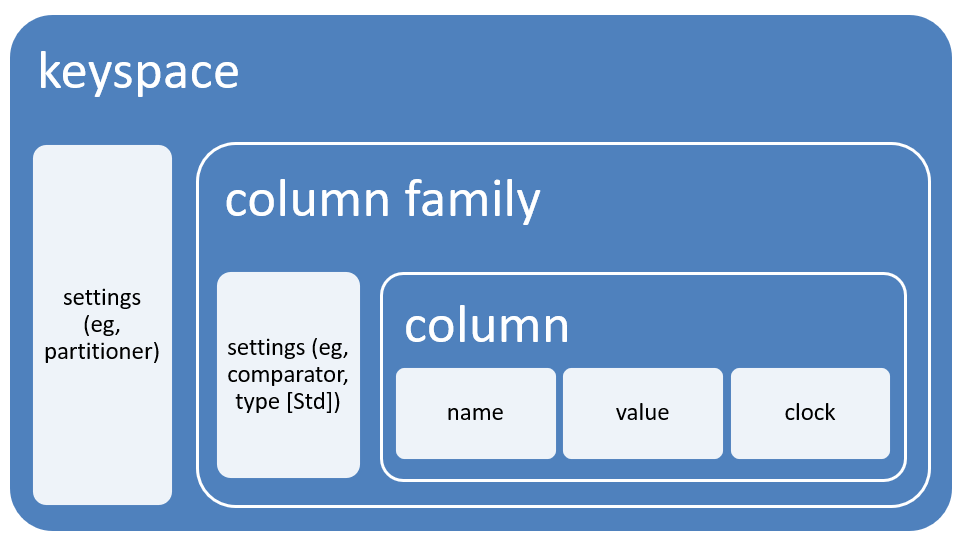

<div>
<img src="attachment:cassandra_structure.png" width="500"/>
</div>

Given below is the syntax for creating a keyspace using the statement `create keyspace`, will be used to communicate and work with Cassandra. It creates a single cluster of Cassandra.




```
# create a single cluster
cassandra.execute("CREATE KEYSPACE test_space WITH replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

# select a keyspace to perform the tasks
cassandra = cluster.connect("test_space")

```



Also, we can drop a KeySpace using the command `DROP KEYSPACE`. Given below is the syntax for dropping a KeySpace.




```
# dropping a KeySpace
cassandra.execute("DROP KEYSPACE test_space")

```



###Elasticsearch

Also, according to the agenda, we need to run Elasticsearch for indexing. Therfore, we run and use a single cluster node of Elasticsearch.

In [ ]:
def init_elastic():

  !sudo chown -R daemon:daemon ./elasticsearch/
  !sudo -H -u daemon elasticsearch/bin/elasticsearch
  !./elasticsearch/bin/elasticsearch -d

  !echo "Waiting a while until Elasticsearch services are up and running..."
  !sleep 30
  # if we get 1 root & 2 daemon process then Elasticsearch instance has started successfully
  !ps -ef  | grep elasticsearch



```
# check if elasticsearch is running
!curl -sX GET "localhost:9200/"
```



On the other hand, to create a dataset in Elasticsearch, we need to set up a data stream or an index. A data stream is a convenient way to ingest, search, and manage time series data. An index is a collection of documents that have similar characteristics. Depending on the type of use and data type, each of the dataset types can be used.

We should follow these steps to set up an index:

*  Define index settings and mappings
*  Create the index
*  Secure the index
*  Index documents

Here is an example of how to define index settings and mappings using the create index API:


```
PUT my-index
{
  "settings" : {
  "number_of_shards" : 1,
  "number_of_replicas" : 0,
  "index.lifecycle.name" : "my-lifecycle-policy"
  },
  "mappings" : {
    "_source" : {
    "enabled" : true
    },
    "@timestamp" : {
    "type" : "date",
    "format" :  "date_optional_time||epoch_millis"
    },
    "@version" : {
    "type" :  "keyword"
    },
  ...
  }
}```



And to set up a data stream, we need to follow these steps:

*  Create an index lifecycle policy
*  Create component templates
*  Create an index template
*  Create the data stream
*  Secure the data stream

Here is an example of how to create an index lifecycle policy using the create lifecycle policy API:



```
PUT _ilm/policy/my_policy
{
  "policy": {
    "_meta": {
      "description": "used for nginx log",
      "project": {
        "name": "myProject",
        "department": "myDepartment"
      }
    },
    "phases": {
      "warm": {
        "min_age": "10d",
        "actions": {
          "forcemerge": {
            "max_num_segments": 1
          }
        }
      },
      "delete": {
        "min_age": "30d",
        "actions": {
          "delete": {}
        }
      }
    }
  }
}
```
If the request succeeds, we receive the result that includes `"acknowledged": true`.


There are various ways for working with Elasticsearch such as Restful or Client. An Elasticsearch client is a software library or a tool that allows us to interact with an Elasticsearch cluster. An Elasticsearch client can perform various operations on data, such as indexing, searching, updating, deleting, aggregating, and more. It can also help us manage cluster, such as creating and deleting indices, configuring mappings and settings, monitoring health and performance, and more.

In [ ]:
def get_elasticsearch_auth(elasticsearch_api_credential = None):
  # import Elasticsearch packages/driver
  from elasticsearch import helpers, Elasticsearch

  elasticsearch_api_credential = elastic_credential

  # setup the Elasticsearch client using credentials
  server_host = elasticsearch_api_credential["server_host"]
  server_port = elasticsearch_api_credential["server_port"]
  username = elasticsearch_api_credential["username"]
  password = elasticsearch_api_credential["password"]
  cloud_id = elasticsearch_api_credential["cloud_id"]

  elastic_server = f"{server_host}:{server_port}"

  # create the Elasticsearch client instance
  elasticsearch = Elasticsearch(
      cloud_id = cloud_id,
      basic_auth=(username, password)
  )

  try:
    return elasticsearch
    # successful response
    print(elasticsearch.info())
    # {'name': 'instance-0000000000', 'cluster_name': ...}
  except Exception as e:
    print("Error : " + str(e))
    exit(1)

In [ ]:
#get_elasticsearch_auth()

# **Step 1: Fetch Data**

In this section, we import the data that was collected offline or online in a data frame named `raw_tweets_df`, which its type can be Pandas or Spark.

## **Loading Dataset (Offline)**

There are three ways to load and read data in Colab, using Google Drive, upload file or from external sources. In the following, we will look at both options. The offline dataset can be read in various formats such as csv and json.

In the following methods, we can read `csv` formay collection by `read.csv()` method that `header=true` means the first row is a header, `sep=','` means the column are seperated using `','`, and `inferschema=true` infers the input schema automatically while loading the data.

Here we declare the file name of the dataset and seperator type that is used globally. We also use the `raw_offline_tweets_df` variable to transfer offline data to the next step.

In [ ]:
# dataset name
dataset_name = "offline-tweets.csv"
data_seperator = ","

###Google Drive
Also, it is necessary to mount Google Drive to Google Colab when we like to read data from it. This will enable us to access any directory on Google Drive inside the workspace on Colab notebook.

In [ ]:
# mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# file path on Google Drive
drive_file_path = f"/content/drive/My Drive/Datasets/{dataset_name}"
# load data from csv to a dataframe.
raw_offline_tweets_df = spark.read.csv(drive_file_path, sep= data_seperator, header = True, inferSchema = True)

###External Sources
Accessing external data from Google Driver or the workspace is not possible when using PySpark in Google Colab. Therefore, we first download the data set from the desired source such as GitHub and then read it.

In [3]:
# file url on Github
url_file_path = f"https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/{dataset_name}"
!wget -O {dataset_name} {url_file_path}

--2023-06-05 20:30:22--  https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/offline-tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14149126 (19M) [text/plain]
Saving to: ‘offline-tweets.csv’

offline-tweets.csv      100%[===================>]  19.24M  --.-KB/s    in 0.1s   

2023-06-05 20:30:22 (92.8 MB/s) - ‘offline-tweets.csv’ saved [14149126/14149126]


In [ ]:
# load data from csv to a dataframe.
raw_offline_tweets_df = spark.read.csv(dataset_name, sep = data_seperator, header = True, inferSchema = True)

## **Scraper (Online)**

A web scraper for social media is a tool that can extract data from social media platforms, such as user profiles, posts, comments, likes, followers, etc.

In this project, since one of our data sources is Twitter, we need a Twitter crawler or Twitter scraper. As mentioned, a Twitter scraper is a tool that can extract data from Twitter, such as user profiles, tweets, hashtags, followers, likes, retweets, etc. Twitter scrapers can be useful for various purposes, such as social media monitoring, market research, lead generation, data mining, sentiment analysis, etc.

There are different types of Twitter scrapers, such as web-based tools, desktop applications, browser extensions, or python libraries. Some of the top Twitter scrapers are:

* Tweepy: An easy-to-use Python library for accessing the Twitter API. It allows you to perform various tasks with Twitter, such as searching for tweets, posting tweets, streaming tweets, accessing user information, etc.

*  ScraperAPI: A web-based tool that provides a simple API to scrape any Twitter profile or search query. It handles proxies, browsers, and captchas for you and returns the data in JSON format. It also offers a free plan with 1000 requests per month.

*  Twint: A python library that allows you to scrape Twitter without using the Twitter API. It can collect tweets, followers, following, likes, lists, trends, and more. It can also store the data in various formats, such as CSV, JSON, SQLite, etc.

*  Phantombuster: A web-based tool that offers various automation scripts for scraping and extracting data from Twitter and other social media platforms. It can collect tweets, followers, following, likes, retweets, comments, etc. It also allows you to schedule and monitor your scraping tasks.

*  TweetScraper: A python library that uses Scrapy to scrape tweets from Twitter's advanced search page. It can collect tweets with various filters and parameters and store them in MongoDB or JSON files.

*  TweetScraper Extension: A browser extension that allows you to scrape tweets from any Twitter page with one click. It can collect tweets with various attributes and export them as CSV or JSON files.

### Twitter

As mentioned, Tweepy is a Python library that allows fetching tweets from Twitter using its API. To fetch tweets, one needs to authenticate with the API keys and form a query with the desired keywords, hashtags, users, or other parameters. Tweepy also supports fetching full text, recent, popular, or mixed tweets, as well as paginating the results to get a specific number of tweets.

Here we define a function to retrieve data from Twitter based on Tweepy. It will be used later in the streaming data step.

In [ ]:
  # Twitter API credentials
  twitter_credential = {}
  twitter_credential["access_token"] = "******************************"
  twitter_credential["access_token_secret"] = "******************************"
  twitter_credential["consumer_key"] = "******************************"
  twitter_credential["consumer_secret"] = "******************************"

In [ ]:
def get_twitter_auth(twitter_api_credential = None):
  # import necessary libraries
  import tweepy

  twitter_api_credential = twitter_credential
  # setup the Twitter API client using credentials from Twitter Developer
  access_token = twitter_api_credential["access_token"]
  access_token_secret = twitter_api_credential["access_token_secret"]
  consumer_key = twitter_api_credential["consumer_key"]
  consumer_secret = twitter_api_credential["consumer_secret"]

  # Twitter authentication
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)

  return auth

In [ ]:
def fetch_tweets(lang = "fa", count = 10, keywords = "bitcoin"):
  # import necessary libraries
  import json
  import tweepy
  import pandas as pd

  # get Twitter authentication
  twitter_auth = get_twitter_auth()

  # creating an object from Twitter API client
  twitter_client = tweepy.API(twitter_auth)

  # setting query parameters
  limit = 10000
  count = count
  language = lang #=> others could be "en", "fa", "ar"
  keywords = keywords  #=> others could be "bitcon OR theter OR dogecoin"
  start_date = None #=> example "2023-07-20"
  end_date = None #=> example "2023-07-20"

  try:
    # fetch tweets (data) according to the specified conditions
    tweets = twitter_client.search_tweets(keywords,
                                          lang = language,
                                          count = count)

    # convert data to Pandas DataFrame format
    df = pd.DataFrame(tweets)
    fetched_tweets_json = [r._json for r in tweets]
    fetched_tweets_df = pd.json_normalize(fetched_tweets_json)


    #pd.json_normalize( user_single.data.data, sep="_" )

    total_tweets = 0

    # log fetch trying
    for tweet in tweets:
        if  total_tweets == 0:
          print(tweet)
          break
        total_tweets +=1

    return fetched_tweets_json

  except tweepy.TweepError as e:
    print("Error : " + str(e))
    exit(1)

Twitter's standard search API only allows one language for the lang parameter. But, we can standard search operators in query to filter by multiple languages, e.g. `q="lang:en OR lang:es`"

In [ ]:
raw_online_tweets_json = fetch_tweets()

Status(_api=<tweepy.api.API object at 0x7a0420da7d30>, _json={'created_at': 'Wed Jul 19 03:11:33 +0000 2023', 'id': 1681502004714020865, 'id_str': '1681502004714020865', 'text': 'چندنفری منو تو گروه های تلگرامی addکردند و بلافاصله چندتا داف خارجی اومدن پی وی  که های سووییتی هاو آر یووو ....\nمن… https://t.co/MLRezLOj2e', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MLRezLOj2e', 'expanded_url': 'https://twitter.com/i/web/status/1681502004714020865', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 880535139922710529, 'id_str': '880535139922710529', 'name': 'پایی

In [ ]:
raw_online_tweets_json[0]

{'created_at': 'Wed Jul 19 03:11:33 +0000 2023',
 'id': 1681502004714020865,
 'id_str': '1681502004714020865',
 'text': 'چندنفری منو تو گروه های تلگرامی addکردند و بلافاصله چندتا داف خارجی اومدن پی وی  که های سووییتی هاو آر یووو ....\nمن… https://t.co/MLRezLOj2e',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/MLRezLOj2e',
    'expanded_url': 'https://twitter.com/i/web/status/1681502004714020865',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 880535139922710529,
  'id_str': '880535139922710529',
  'name': 'پاییزان',
  'screen_name': 'pa

## **Descriptive Analysis**

Twitter JSON Tweet schema can be seen below. Twitter JSON Tweet schema is the format of the data that Twitter returns when fetching tweets using its API. The schema consists of various attributes and objects that describe the tweet, such as its text, id, creation time, author, entities, and geo information. The schema also varies depending on the version and type of the API, such as standard, premium, enterprise, or v2.

In [ ]:
{'created_at': 'Fri Jul 14 07:07:53 +0000 2023',
 'id': 1679749541539487745,
 'id_str': '1679749541539487745',
 'text': '#GM\nظاهرا بلخره بعد از گذشت 334 روز دامینتتس تتر خط روند داینامیک صعودی خودشو شکوند\U0001fae0\nاگه این شکستی که اتفاق افتاده… https://t.co/tBNfca6rJg',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'GM', 'indices': [0, 3]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/tBNfca6rJg',
    'expanded_url': 'https://twitter.com/i/web/status/1679749541539487745',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1541677697637777409,
  'id_str': '1541677697637777409',
  'name': '𝔸𝕣𝕞𝕚𝕟.𝕗𝕦𝕖𝕝',
  'screen_name': '0x4rmin',
  'location': '',
  'description': 'Obsessed with Blockchain & Cryptor & Trade',
  'url': 'https://t.co/SzLRLwiwOH',
  'entities': {'url': {'urls': [{'url': 'https://t.co/SzLRLwiwOH',
      'expanded_url': 'https://link3.to/armin_mohtasham',
      'display_url': 'link3.to/armin_mohtasham',
      'indices': [0, 23]}]},
   'description': {'urls': []}},
  'protected': False,
  'followers_count': 813,
  'friends_count': 806,
  'listed_count': 3,
  'created_at': 'Tue Jun 28 07:00:04 +0000 2022',
  'favourites_count': 9729,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': False,
  'verified': False,
  'statuses_count': 9145,
  'lang': None,
  'contributors_enabled': False,
  'is_translator': False,
  'is_translation_enabled': False,
  'profile_background_color': 'F5F8FA',
  'profile_background_image_url': None,
  'profile_background_image_url_https': None,
  'profile_background_tile': False,
  'profile_image_url': 'http://pbs.twimg.com/profile_images/1669071934796050433/N_9hGOEc_normal.jpg',
  'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1669071934796050433/N_9hGOEc_normal.jpg',
  'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1541677697637777409/1686736453',
  'profile_link_color': '1DA1F2',
  'profile_sidebar_border_color': 'C0DEED',
  'profile_sidebar_fill_color': 'DDEEF6',
  'profile_text_color': '333333',
  'profile_use_background_image': True,
  'has_extended_profile': True,
  'default_profile': True,
  'default_profile_image': False,
  'following': False,
  'follow_request_sent': False,
  'notifications': False,
  'translator_type': 'none',
  'withheld_in_countries': []},
 'geo': None,
 'coordinates': None,
 'place': None,
 'contributors': None,
 'is_quote_status': True,
 'quoted_status_id': 1678315944945360898,
 'quoted_status_id_str': '1678315944945360898',
 'quoted_status': {'created_at': 'Mon Jul 10 08:11:17 +0000 2023',
  'id': 1678315944945360898,
  'id_str': '1678315944945360898',
  'text': 'حس میکنم دامیننس تتر قراره یه ریزشی داشته باشه🤷🏻\u200d♂️🤔\n#USDT https://t.co/gL9qlynHBF',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'USDT', 'indices': [53, 58]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 1678315051403313194,
     'id_str': '1678315051403313194',
     'indices': [59, 82],
     'media_url': 'http://pbs.twimg.com/media/F0qSpawWACo6BOl.png',
     'media_url_https': 'https://pbs.twimg.com/media/F0qSpawWACo6BOl.png',
     'url': 'https://t.co/gL9qlynHBF',
     'display_url': 'pic.twitter.com/gL9qlynHBF',
     'expanded_url': 'https://twitter.com/0x4rmin/status/1678315944945360898/photo/1',
     'type': 'photo',
     'sizes': {'medium': {'w': 1200, 'h': 675, 'resize': 'fit'},
      'small': {'w': 680, 'h': 382, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'large': {'w': 1366, 'h': 768, 'resize': 'fit'}}}]},
  'extended_entities': {'media': [{'id': 1678315051403313194,
     'id_str': '1678315051403313194',
     'indices': [59, 82],
     'media_url': 'http://pbs.twimg.com/media/F0qSpawWACo6BOl.png',
     'media_url_https': 'https://pbs.twimg.com/media/F0qSpawWACo6BOl.png',
     'url': 'https://t.co/gL9qlynHBF',
     'display_url': 'pic.twitter.com/gL9qlynHBF',
     'expanded_url': 'https://twitter.com/0x4rmin/status/1678315944945360898/photo/1',
     'type': 'photo',
     'sizes': {'medium': {'w': 1200, 'h': 675, 'resize': 'fit'},
      'small': {'w': 680, 'h': 382, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'large': {'w': 1366, 'h': 768, 'resize': 'fit'}}}]},
  'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 1541677697637777409,
   'id_str': '1541677697637777409',
   'name': '𝔸𝕣𝕞𝕚𝕟.𝕗𝕦𝕖𝕝',
   'screen_name': '0x4rmin',
   'location': '',
   'description': 'Obsessed with Blockchain & Cryptor & Trade',
   'url': 'https://t.co/SzLRLwiwOH',
   'entities': {'url': {'urls': [{'url': 'https://t.co/SzLRLwiwOH',
       'expanded_url': 'https://link3.to/armin_mohtasham',
       'display_url': 'link3.to/armin_mohtasham',
       'indices': [0, 23]}]},
    'description': {'urls': []}},
   'protected': False,
   'followers_count': 813,
   'friends_count': 806,
   'listed_count': 3,
   'created_at': 'Tue Jun 28 07:00:04 +0000 2022',
   'favourites_count': 9729,
   'utc_offset': None,
   'time_zone': None,
   'geo_enabled': False,
   'verified': False,
   'statuses_count': 9145,
   'lang': None,
   'contributors_enabled': False,
   'is_translator': False,
   'is_translation_enabled': False,
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_background_image_url_https': None,
   'profile_background_tile': False,
   'profile_image_url': 'http://pbs.twimg.com/profile_images/1669071934796050433/N_9hGOEc_normal.jpg',
   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1669071934796050433/N_9hGOEc_normal.jpg',
   'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1541677697637777409/1686736453',
   'profile_link_color': '1DA1F2',
   'profile_sidebar_border_color': 'C0DEED',
   'profile_sidebar_fill_color': 'DDEEF6',
   'profile_text_color': '333333',
   'profile_use_background_image': True,
   'has_extended_profile': True,
   'default_profile': True,
   'default_profile_image': False,
   'following': False,
   'follow_request_sent': False,
   'notifications': False,
   'translator_type': 'none',
   'withheld_in_countries': []},
  'geo': None,
  'coordinates': None,
  'place': None,
  'contributors': None,
  'is_quote_status': False,
  'retweet_count': 0,
  'favorite_count': 5,
  'favorited': False,
  'retweeted': False,
  'possibly_sensitive': False,
  'lang': 'fa'},
 'retweet_count': 0,
 'favorite_count': 0,
 'favorited': False,
 'retweeted': False,
 'possibly_sensitive': False,
 'lang': 'fa'}

After reading the data into PySpark as DataFrame (DF), we can show the first few observations using `show()` or `cache()` method.

Each of them displays data that loaded from our dataset into a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

How big is the dataset?

In [ ]:
# extract number of rows and columns from the Dataframe
print(f"Dimension of the dataset is:")
print(f"--Rows: {df.count()}")
print(f"--Columns: {len(df.columns)}")

Dimension of the dataset is:
--Rows: 9899
--Columns: 204


We can see the names of the dataset columns below.

In [ ]:
{'created_at': 'Fri Jul 14 07:00:33 +0000 2023',
 'id': 1679747696616169472,
 'id_str': '1679747696616169472',
 'text': 'RT @BTC_Archive: JUST IN: 🇺🇸 SEC officially acknowledges #Bitcoin\xa0ETF application from Bitwise. https://t.co/RhqQ8jdlRZ',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [57, 65]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'BTC_Archive',
    'name': 'Bitcoin Archive',
    'id': 970994516357472257,
    'id_str': '970994516357472257',
    'indices': [3, 15]}],
  'urls': [],
  'media': [{'id': 1679510416236371970,
    'id_str': '1679510416236371970',
    'indices': [96, 119],
    'media_url': 'http://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
    'url': 'https://t.co/RhqQ8jdlRZ',
    'display_url': 'pic.twitter.com/RhqQ8jdlRZ',
    'expanded_url': 'https://twitter.com/BTC_Archive/status/1679510421475131392/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1098, 'h': 373, 'resize': 'fit'},
     'small': {'w': 680, 'h': 231, 'resize': 'fit'},
     'large': {'w': 1098, 'h': 373, 'resize': 'fit'}},
    'source_status_id': 1679510421475131392,
    'source_status_id_str': '1679510421475131392',
    'source_user_id': 970994516357472257,
    'source_user_id_str': '970994516357472257'}]},
 'extended_entities': {'media': [{'id': 1679510416236371970,
    'id_str': '1679510416236371970',
    'indices': [96, 119],
    'media_url': 'http://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
    'url': 'https://t.co/RhqQ8jdlRZ',
    'display_url': 'pic.twitter.com/RhqQ8jdlRZ',
    'expanded_url': 'https://twitter.com/BTC_Archive/status/1679510421475131392/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1098, 'h': 373, 'resize': 'fit'},
     'small': {'w': 680, 'h': 231, 'resize': 'fit'},
     'large': {'w': 1098, 'h': 373, 'resize': 'fit'}},
    'source_status_id': 1679510421475131392,
    'source_status_id_str': '1679510421475131392',
    'source_user_id': 970994516357472257,
    'source_user_id_str': '970994516357472257'}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1403412308391600130,
  'id_str': '1403412308391600130',
  'name': 'Anakin Skywalker',
  'screen_name': 'Anakin_Skwlkr',
  'location': '',
  'description': 'DarthTwitter 💎🙌🏼',
  'url': None,
  'entities': {'description': {'urls': []}},
  'protected': False,
  'followers_count': 375,
  'friends_count': 101,
  'listed_count': 12,
  'created_at': 'Fri Jun 11 18:04:47 +0000 2021',
  'favourites_count': 46529,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'verified': False,
  'statuses_count': 10618,
  'lang': None,
  'contributors_enabled': False,
  'is_translator': False,
  'is_translation_enabled': False,
  'profile_background_color': 'F5F8FA',
  'profile_background_image_url': None,
  'profile_background_image_url_https': None,
  'profile_background_tile': False,
  'profile_image_url': 'http://pbs.twimg.com/profile_images/1618131003960180736/eJGwqNTM_normal.jpg',
  'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1618131003960180736/eJGwqNTM_normal.jpg',
  'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1403412308391600130/1629762796',
  'profile_link_color': '1DA1F2',
  'profile_sidebar_border_color': 'C0DEED',
  'profile_sidebar_fill_color': 'DDEEF6',
  'profile_text_color': '333333',
  'profile_use_background_image': True,
  'has_extended_profile': True,
  'default_profile': True,
  'default_profile_image': False,
  'following': False,
  'follow_request_sent': False,
  'notifications': False,
  'translator_type': 'none',
  'withheld_in_countries': []},
 'geo': None,
 'coordinates': None,
 'place': None,
 'contributors': None,
 'retweeted_status': {'created_at': 'Thu Jul 13 15:17:42 +0000 2023',
  'id': 1679510421475131392,
  'id_str': '1679510421475131392',
  'text': 'JUST IN: 🇺🇸 SEC officially acknowledges #Bitcoin\xa0ETF application from Bitwise. https://t.co/RhqQ8jdlRZ',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [40, 48]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 1679510416236371970,
     'id_str': '1679510416236371970',
     'indices': [79, 102],
     'media_url': 'http://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
     'url': 'https://t.co/RhqQ8jdlRZ',
     'display_url': 'pic.twitter.com/RhqQ8jdlRZ',
     'expanded_url': 'https://twitter.com/BTC_Archive/status/1679510421475131392/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 1098, 'h': 373, 'resize': 'fit'},
      'small': {'w': 680, 'h': 231, 'resize': 'fit'},
      'large': {'w': 1098, 'h': 373, 'resize': 'fit'}}}]},
  'extended_entities': {'media': [{'id': 1679510416236371970,
     'id_str': '1679510416236371970',
     'indices': [79, 102],
     'media_url': 'http://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/F07R0zxWYAI58WO.jpg',
     'url': 'https://t.co/RhqQ8jdlRZ',
     'display_url': 'pic.twitter.com/RhqQ8jdlRZ',
     'expanded_url': 'https://twitter.com/BTC_Archive/status/1679510421475131392/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 1098, 'h': 373, 'resize': 'fit'},
      'small': {'w': 680, 'h': 231, 'resize': 'fit'},
      'large': {'w': 1098, 'h': 373, 'resize': 'fit'}}}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 970994516357472257,
   'id_str': '970994516357472257',
   'name': 'Bitcoin Archive',
   'screen_name': 'BTC_Archive',
   'location': 'bitcoin.archive.channel@gmail ',
   'description': '#Bitcoin News, Insight & Commentary 🚀 🌗 \nFollow me 👉@ArchieX__',
   'url': 'https://t.co/l2Ypy0TJNU',
   'entities': {'url': {'urls': [{'url': 'https://t.co/l2Ypy0TJNU',
       'expanded_url': 'http://YouTube.com/c/BitcoinArchivewithArchie?sub_confirmation=1',
       'display_url': 'YouTube.com/c/BitcoinArchi…',
       'indices': [0, 23]}]},
    'description': {'urls': []}},
   'protected': False,
   'followers_count': 1272662,
   'friends_count': 672,
   'listed_count': 7711,
   'created_at': 'Tue Mar 06 12:08:27 +0000 2018',
   'favourites_count': 157635,
   'utc_offset': None,
   'time_zone': None,
   'geo_enabled': False,
   'verified': False,
   'statuses_count': 42407,
   'lang': None,
   'contributors_enabled': False,
   'is_translator': False,
   'is_translation_enabled': False,
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_background_image_url_https': None,
   'profile_background_tile': False,
   'profile_image_url': 'http://pbs.twimg.com/profile_images/1567563296106053632/zPdnJQxk_normal.jpg',
   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1567563296106053632/zPdnJQxk_normal.jpg',
   'profile_banner_url': 'https://pbs.twimg.com/profile_banners/970994516357472257/1686177181',
   'profile_link_color': '1DA1F2',
   'profile_sidebar_border_color': 'C0DEED',
   'profile_sidebar_fill_color': 'DDEEF6',
   'profile_text_color': '333333',
   'profile_use_background_image': True,
   'has_extended_profile': True,
   'default_profile': True,
   'default_profile_image': False,
   'following': False,
   'follow_request_sent': False,
   'notifications': False,
   'translator_type': 'none',
   'withheld_in_countries': []},
  'geo': None,
  'coordinates': None,
  'place': None,
  'contributors': None,
  'is_quote_status': False,
  'retweet_count': 872,
  'favorite_count': 4335,
  'favorited': False,
  'retweeted': False,
  'possibly_sensitive': False,
  'lang': 'en'},
 'is_quote_status': False,
 'retweet_count': 872,
 'favorite_count': 0,
 'favorited': False,
 'retweeted': False,
 'possibly_sensitive': False,
 'lang': 'en'}

We can review the dataset by looking at the first few rows of data. For accessing data multiple times, `cache()` are used .

In [ ]:
raw_offline_tweets_df.cache().show()

+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+
|                 id|            user_id|      user_name|   user_display_name|                text|            hashtags|lat|long|       location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|
+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+
|1681243282855034880|1583458203412713473|  hojjatrajabi3|              HOJJAT|RT @Mksh9978: 💮 ...|[تست‌نت, ایردراپ,...|  0|   0|                    |         0|            9|  fa|2023-07-18 10:03:29|rt :  ‌نت همراه ب...|

According Tweet object schema was introduced earlier, the following properties are selected from structure:

* id
* created_at
* text
* user_id
* user_name
* user_screen_name
* geo
* retweet_count
* favorite_count
* lang


Before doing anything, it is better to check the dataset for missing values and null, if any, correct or remove them using different methods based on the type of them. we need to get a general overview and description of the dataset. Commonly `df.dtypes` and `printSchema()` are the two methods used to view data types of a dataframe in pyspark. We can also retrieve the data type of a specific column name using `df.schema["name"].dataType` or get all column names by using `df.columns`.



But since we get the data live, it is not important for us to check whether the data is null because that part of the data that we will extract is not null.

Note, we are goping to do Exploratory Data Analysis (EDA) in Kibana section.

# **Step 2: Data Preprocessing**

Before sending the data collected from online sources in the distributed communication channel, we select only the necessary parts and send them in the message broker channel like Kafka. This makes system and network resources to be used optimally. Therefore, we define a function that selects from the data model only the relevant fields that we announced earlier and ignores the other fields of JSON Tweet.

In [ ]:
def process_tweet(tweet, is_json = False):

  import json
  from datetime import date, datetime, timezone
  from geopy.geocoders import Nominatim

  raw_tweet = ""
  result = {}

  if is_json :
    raw_tweet = json.loads(tweet)
  else :
    raw_tweet = tweet

  """
  * id +
  * created_at +
  * text +
  * hashtags +
  * user_id +
  * user_name +
  * user_screen_name +
  * geo (lat, long)
  * like_count +
  * retweet_count +
  * lang +
  """

#"extended_tweet" in rawtweet

  result["id"] = raw_tweet["id"]
  result["user_id"] = raw_tweet["user"]["id"]
  result["user_name"] = raw_tweet["user"]["screen_name"]
  result["user_display_name"] = raw_tweet["user"]["name"]

  if tweet["truncated"] == True and hasattr(raw_tweet, "extended_tweet"):
      result["text"] = raw_tweet["extended_tweet"]["full_text"]
      result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["extended_tweet"]["entities"]["hashtags"]]
  #if hasattr(raw_tweet, "retweeted_status"): #=> check if retweet
  else:
      result["text"] = raw_tweet["text"]
      result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["entities"]["hashtags"]]

  result["lat"] = 0
  result["long"] = 0
  result["location_name"] = raw_tweet["user"]["location"] #=> user location in profile
  #result["country"] = raw_tweet["place"]["country"] # tweet country in profile
  result["like_count"] = raw_tweet["favorite_count"] #=> like count
  result["retweet_count"] = raw_tweet["retweet_count"] #=> retweet count
  #result["reply_count"] = raw_tweet["reply_count"] #=> comment count
  result["lang"] = raw_tweet["lang"]

  # example tweet datetime: Mon Jul 17 07:34:07 +0000 2023
  # parse tweet date by "%a %b %d %H:%M:%S +0000 %Y" or "%a %b %d %H:%M:%S %z %Y"
  # then formate it to "%Y-%m-%d %H:%M:%S", output: 2023-07-17 07:34:07
  result["created_at"] = datetime.strptime(raw_tweet["created_at"],"%a %b %d %H:%M:%S %z %Y").strftime("%Y-%m-%d %H:%M:%S")

  response = json.dumps(result, ensure_ascii = False)

  return response


In [ ]:
raw_online_tweets_json = fetch_tweets()

Status(_api=<tweepy.api.API object at 0x7cac10d03640>, _json={'created_at': 'Tue Jul 18 14:32:56 +0000 2023', 'id': 1681311092944019460, 'id_str': '1681311092944019460', 'text': 'این واسه ۲ سال پیش،\nامروز ایردراپ دادن قشنگ انرژی پیچید،\nالانم تایم خوبیه،\nکلی هم پروژه هست،\nمثل من تنبل نباشید!… https://t.co/s6vwTpqUoF', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/s6vwTpqUoF', 'expanded_url': 'https://twitter.com/i/web/status/1681311092944019460', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [114, 137]}]}, 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 932659686331043842, 'id_str': '932659686331043842', 'name': 'Inrangy', 'screen

In [ ]:
raw_online_tweets_json[0]

{'created_at': 'Tue Jul 18 14:32:56 +0000 2023',
 'id': 1681311092944019460,
 'id_str': '1681311092944019460',
 'text': 'این واسه ۲ سال پیش،\nامروز ایردراپ دادن قشنگ انرژی پیچید،\nالانم تایم خوبیه،\nکلی هم پروژه هست،\nمثل من تنبل نباشید!… https://t.co/s6vwTpqUoF',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/s6vwTpqUoF',
    'expanded_url': 'https://twitter.com/i/web/status/1681311092944019460',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [114, 137]}]},
 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 932659686331043842,
  'id_str': '932659686331043842',
  'name': 'Inrangy',
  'screen_name': 'inrangy',
  'lo

# **Step 3: Data Storing (in NoSQL)**

At this stage, after receiving and reading the message sent in the Kafka channel, we store them in a database so that they are available for data processing and engineering in the next steps. We believe that this work will lead to good performance in text mining, sentiment analysis and machine learning.

In [ ]:
def save_raw_tweets_cassandra(data_object, db_name = None, is_json = False):

  import json
  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "raw_data"

  item = ""

  if is_json == True:
    item = json.loads(data_object)
  else:
    item = data_object


  cassandra = get_cassandra_auth()
  # create a single cluster
  cassandra.execute(f"CREATE KEYSPACE IF NOT EXISTS {db_name_keyspace} WITH " +
                    "replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

  # select a keyspace to perform the tasks
  cassandra.keyspace = db_name_keyspace

  # create a table for tweets
  query = f"CREATE TABLE IF NOT EXISTS {db_name_keyspace}.raw_tweets (\
                                        id bigint,\
                                        tweet text,\
                                        user_id bigint,\
                                        user_name text,\
                                        user_display_name text,\
                                        hashtags text,\
                                        like_count bigint,\
                                        retweet_count bigint,\
                                        location text,\
                                        created_date Timestamp,\
                                        PRIMARY KEY (user_name, created_date, id))\
                                        WITH CLUSTERING ORDER BY (created_date DESC);"

  cassandra.execute(query)

  # create insert query template
  raw_tweet_insert = f"INSERT INTO {db_name_keyspace}.raw_tweets (id, tweet, user_id, user_name, user_display_name, hashtags, like_count, retweet_count, location, created_date) \
                        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, 'N\A', %s)"


  cassandra.execute(raw_tweet_insert,
                    (item["id"], item["text"], item["user_id"], item["user_name"], item["user_display_name"], ", ".join(item["hashtags"]), item["like_count"], item["retweet_count"], item["created_at"]))

  #print(f"The entry of {count} data is inserted into raw_tweets.")

  if False:
    # get the description of table
    result = cassandra.execute(f"DESCRIBE TABLE {db_name_keyspace}.raw_tweets")
    print(result)

Also, if needed, the table can be deleted with the function below.

In [ ]:
def drop_raw_tweets_cassandra(db_name = None):
  import cassandra
  from cassandra.cluster import Cluster

  db_name_raw_data = "raw_data"

  cassandra = get_cassandra_auth()

  # select a keyspace to perform the tasks
  #cassandra.keyspace = db_name_raw_data

  # drop a table
  result = cassandra.execute(f"DROP TABLE IF EXISTS {db_name_raw_data}.raw_tweets;")
  print(result)

And get stored data with following function.

In [ ]:
def get_saved_raw_tweets():

  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "raw_data"

  cassandra = get_cassandra_auth()
  spark = init_pyspark()

  # query to retrive stored data
  result = cassandra.execute(f"SELECT * FROM {db_name_keyspace}.raw_tweets")

  spark = init_pyspark()

  if not result:
    print("There is no result.")
  else:
    result_df = spark.createDataFrame([row for row in result])
    print(f"{result_df.count()} items found.")
    result_df.show()

# **Step 4: Analyzing Data with Spark**

Analyzing data with Spark is the process of using Apache Spark, a fast and general-purpose cluster computing platform, to perform various types of data analysis tasks, such as interactive queries, batch processing, stream processing, and machine learning. Spark offers simple APIs in Python, Java, Scala, and SQL, and rich built-in libraries for different workloads. Spark also integrates with other Big Data tools, such as Hadoop and Cassandra.

## **Sentiment Analysis**


Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information in a given piece of text. It can help to understand the sentiment behind a text, whether it is positive, negative, or neutral, or even more specific emotions like enjoyment, anger, disgust, sadness, fear, and surprise. Sentiment analysis can be applied to various domains such as customer feedback, social media, healthcare, marketing, and more.

Natural language processing (NLP), which is a branch of artificial intelligence that deals with the interaction between computers and human languages. NLP aims to enable computers to understand, analyze, generate, and manipulate natural language texts or speech. Some of the applications of NLP are speech recognition, machine translation, chatbots, sentiment analysis, text summarization, information extraction, and natural language generation. NLP combines techniques from linguistics, computer science, and machine learning to create systems that can perform various tasks with natural language. NLP is a challenging and evolving field that has many opportunities and challenges for research and development.

There are many Python libraries for natural language processing (NLP), but some of the most popular and widely used ones are:

*  NLTK: Natural Language Toolkit is one of the oldest and most comprehensive Python NLP libraries. It provides easy-to-use interfaces to over 50 corpora and lexical resources, as well as a suite of text processing tools for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. NLTK is suitable for beginners and education, but it can be slow and not very scalable for production use.

*  SpaCy: SpaCy is a modern and fast NLP library that offers industrial-strength performance and accuracy. It supports over 60 languages and provides state-of-the-art models for various NLP tasks, such as named entity recognition, dependency parsing, part-of-speech tagging, text classification, and word vectors. SpaCy also has a user-friendly API and a rich ecosystem of extensions and integrations.

*  CoreNLP: CoreNLP or Stanza is a Python wrapper for Stanford CoreNLP, a Java-based NLP toolkit developed by Stanford University. CoreNLP provides a set of natural language analysis tools that can work together or separately. It covers the core areas of NLP, such as tokenization, lemmatization, part-of-speech tagging, named entity recognition, sentiment analysis, parsing, coreference resolution, and relation extraction. CoreNLP also supports multiple languages and offers a web service interface.

*  Polyglot: Polyglot is a Python library for multilingual NLP. It supports over 130 languages and provides models and methods for various NLP tasks, such as language detection, tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, word embeddings, and transliteration. Polyglot leverages the Unicode standard and the CLDR dataset to achieve high coverage and accuracy across languages.

*  Gensim: Gensim is a specialized Python library for topic modeling, document indexing, and similarity retrieval. It relies on efficient algorithms to process large amounts of text data and extract semantic information. Gensim can handle input larger than RAM and supports distributed computing. Some of the features of Gensim are word2vec, latent semantic analysis, latent Dirichlet allocation, and hierarchical Dirichlet process.

*  TextBlob: TextBlob is a simple and intuitive Python library for text processing. It is built on top of NLTK and Pattern, and provides a consistent API for common NLP tasks, such as sentiment analysis, spelling correction, translation, n-grams, word inflection, and more. TextBlob also has a text classification module that allows users to create custom classifiers using various algorithms.

* Spark-NLP: Spark-NLP is a natural language processing library built on top of Apache Spark. It provides simple, performant and accurate NLP annotations for machine learning pipelines that can scale easily in a distributed environment. Spark-NLP comes with over 1100+ pre-trained pipelines and models in more than 192+ languages. It also supports tasks such as tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, spell checking, text classification, machine translation, question answering, text summarization, text generation and many more NLP tasks. Spark-NLP is the only open-source NLP library that offers state-of-the-art transformers such as BERT, CamemBERT, ALBERT, ELECTRA, XLNet, DistilBERT, RoBERTa, DeBERTa, XLM-RoBERTa, Longformer, ELMO, Universal Sentence Encoder, Facebook BART, Instructor Embeddings, E5 Embeddings, Google T5, MarianMT, OpenAI GPT2 and many more not only to Python and R but also to JVM ecosystem (Java, Scala and Kotlin) at scale by extending Apache Spark natively.

*  AllenNLP: AllenNLP is a research-oriented Python library for deep learning-based NLP. It is built on top of PyTorch and provides high-level abstractions and components for building and evaluating NLP models. AllenNLP also includes pre-trained models for several NLP tasks, such as reading comprehension, semantic role labeling, textual entailment, and coreference resolution. AllenNLP is designed to make NLP research more accessible and reproducible.


Since the priority of NLP is on Persian (Farsi), a library should be selected that supports Persian language sentiment analysis.
After checking and studying free and famous libraries, we chose Polygot library for Persian and NLTK for English. Of course, some above libraries only provide raw models, which due to the limitations, we did not have enough time to train the language model.

In [ ]:
def init_nltk():
  !pip install nltk
  import nltk

  #nltk.download("all")
  #nltk.download("popular")
  nltk.download("stopwords")
  nltk.download("punkt")
  nltk.download("wordnet")
  nltk.download("vader_lexicon")

In [ ]:
def init_polyglot():

  !pip install polyglot
  !pip install pyicu
  !pip install pycld2
  !pip install morfessor

  import polyglot
  from polyglot.downloader import downloader

  downloader.download("sentiment2.en")
  downloader.download("sentiment2.fa")

In [ ]:
def init_nlp_core():

  init_nltk()
  init_polyglot()

In [ ]:
def preprocess_text(text):

  import re
  import os
  from collections import Counter

  response = {}

  #tweet = p.clean(tweet)

  # make all words in small letter
  text = text.lower()

  # get all hashtags
  hashtags = re.findall(r"#\w+",  text)
  hashtags = Counter(hashtags).most_common()[:6]
  response["hashtags"] = hashtags

  # remove links
  text = re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+(/\S+)?|\S+\.com\S+", "", text)

  # remove the hashtags and mentions
  text = re.sub(r"#\w+|@\w+", "", text)

  # remove Emoji patterns, emoticons, symbols & pictographs, transport & map symbols, flags (iOS), etc
  webpattern = re.compile("["
                          u"\U0001F600-\U0001F64F"
                          u"\U0001F300-\U0001F5FF"
                          u"\U0001F680-\U0001F6FF"
                          u"\U0001F1E0-\U0001F1FF"
                          u"\U00002500-\U00002BEF"
                          u"\U00002702-\U000027B0"
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          u"\U0001f926-\U0001f937"
                          u"\U00010000-\U0010ffff"
                          u"\u2640-\u2642"
                          u"\u2600-\u2B55"
                          u"\u200d"
                          u"\u23cf"
                          u"\u23e9"
                          u"\u231a"
                          u"\ufe0f"
                          u"\u3030"
                          "]+", flags=re.UNICODE)
  text = webpattern.sub(r'', text)


  # remove non alpha words
  #text = re.findall(r"\w{3,}", text)
  #text = ' '.join(text)

  response["preprocess_text"] = text

  return text

In [ ]:
def process_text(content, lang = "en", is_json = False, field_name = "tweet"):

  import string
  import nltk
  from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, lm, FreqDist
  from nltk.corpus import stopwords
  from regex import match as re_match

  text = ""

  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content

  if lang == "en" :
    c=0

  # remove stopwords
  def remove_stopwords(text, return_array = False):
      stop_words = set(stopwords.words("english"))
      word_tokens = word_tokenize(text)
      filtered_text = [word for word in word_tokens if word not in stop_words]
      return filtered_text if return_array else " ".join(filtered_text)

  # stem words in the list of tokenized words
  def stem_words(text, return_array = False):
      stemmer = PorterStemmer()
      word_tokens = word_tokenize(text)
      stems = [stemmer.stem(word) for word in word_tokens]
      return stems if return_array else " ".join(stems)

  # lemmatize string & provide context i.e. part-of-speech
  def lemmatize_word(text, return_array = False):
      lemmatizer = WordNetLemmatizer()
      word_tokens = word_tokenize(text)
      lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
      return lemmas if return_array else " ".join(lemmas)

  text = remove_stopwords(text)
  text = stem_words(text)
  text = lemmatize_word(text)

  return text

In [ ]:
def analyze_sentiment(content, lang = "en", is_json = False, field_name = "tweet"):
  #import pdb
  #pdb.set_trace()

  import json
  import nltk
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  from textblob import TextBlob
  from polyglot.text import Text, Word

  text = ""
  sentiment_status = ""
  text_sentiment1 = ""
  text_sentiment2 = ""


  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content


  # get the polarity score for English (en) text
  if lang == "en" :
    """
    # calculate polarity using TextBlob analyser
    sentiment_result_textblob = TextBlob(text)
    polarity_textblob = sentiment_result_textblob.sentiment.polarity

    if polarity_textblob > 0:
      sentiment_status = "Positive"
    elif polarity_textblob < 0:
      sentiment_status = "Negative"
    elif polarity_textblob == 0:
      sentiment_status = "Neutral"
    """

    # calculate polarity using NLTK-Vader analyser
    vader_analyzer = SentimentIntensityAnalyzer()
    sentiment_result_vader = vader_analyzer.polarity_scores(text)

    if sentiment_result_vader["compound"] > 0:
      sentiment_status = "Positive"
    elif sentiment_result_vader["compound"] < 0:
      sentiment_status = "Negative"
    elif sentiment_result_vader["compound"] == 0:
      sentiment_status = "Neutral"

  # get the polarity score for Persian/Farsi (fa) text
  if lang == "fa" :
    #import hazm
    #hstemmer = hazm.Stemmer()
    #from persian_sa.persian_sa import persian_sa

    try:
      # calculate polarity using PolyGlot Lexicon analyser
      sentiment_result_polyglot = Text(text)
      polarity_polyglot = sentiment_result_polyglot.polarity

      if polarity_polyglot > 0:
        sentiment_status = "Positive"
      elif polarity_polyglot < 0:
        sentiment_status = "Negative"
      elif polarity_polyglot == 0:
        sentiment_status = "Neutral"

      # handle zerodivision exception
      #except ZeroDivisionError:
        sentiment_status = "Neutral"
    except:
      sentiment_status = "Neutral"

  return sentiment_status

In [ ]:
def analyze_text(content, lang = "en", is_json = False, field_name = "tweet"):

  import json

  text = ""
  result = {}

  if is_json and field_name != None :
    json = json.loads(content)
    text = json[field_name]
  else :
    text = content

  result["preprocess_text"] = preprocess_text(text)
  result["processed_text"] = process_text(result["preprocess_text"], lang = lang)
  result["sentiment_status"] = analyze_sentiment (result["preprocess_text"],
                                                              lang = lang,
                                                              is_json = is_json,
                                                              field_name = field_name)
  #, result["sentiment_polarity"]
  response = json.dumps(result, ensure_ascii = False)

  return response

## **Label Prediction**

Label prediction is the task of predicting the class or category of an input data based on some features or attributes. For example, label prediction can be used to classify images, text, audio, or any other type of data. Label prediction is a type of supervised learning, which means that the model learns from a set of labeled data, where the correct class or category is known for each input.

### **Algorithms**

In this section, the identification of tweet polarity as well as the identification of tweet hashtags and news by two machine learning algorithms, Logistic Regression and NiveBayse, are called.

#### Logistic regression

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For example, a logistic regression could be used to predict whether a political candidate will win or lose an election or whether a high school student will be admitted or not to a particular college. These binary outcomes allow straightforward decisions between two alternatives. Also a logistic regression model can take into consideration multiple input criteria.



#### NiveBayse

In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. The Naïve Bayes classifier is a popular supervised machine learning algorithm used for classification tasks such as text classification. It belongs to the family of generative learning algorithms, which means that it models the distribution of inputs for a given class or category. This approach is based on the assumption that the features of the input data are conditionally independent given the class, allowing the algorithm to make predictions quickly and accurately. In statistics, naive Bayes classifiers are considered as simple probabilistic classifiers that apply Bayes’ theorem. This theorem is based on the probability of a hypothesis, given the data and some prior knowledge. The naive Bayes classifier assumes that all features in the input data are independent of each other, which is often not true in real-world scenarios. However, despite this simplifying assumption, the naive Bayes classifier is widely used because of its efficiency and good performance in many real-world applications.

### **Preparation**


To prepare data for use in machine learning algorithms, the following two steps must be performed:

#### StringIndexer

The StringIndexer is a vital PySpark feature that helps convert categorical string columns in a DataFrame into numerical indices. This conversion is necessary because most machine learning algorithms cannot work directly with string data.
The StringIndexer assigns a unique index to each distinct string value in the input column and maps it to a new output column of integer indices.

#### VectorAssember

VectorAssember from Spark ML library is a module that allows to convert numerical features into a single vector that is used by the machine learning models. As an overview, what is does is it takes a list of columns (features) and combines it into a single vector column (feature vector). It is then used as an input into the machine learning models in Spark ML.

The data has been received in the form of Json, so it must be converted to a dataframe pyspark for use. For this purpose, the pyarrow library was used:

In [ ]:
pip install pyarrow

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
import pyarrow as pa
import pyarrow.parquet as pq

# convert pandas dataframe to PyArrow table
table = pa.Table.from_pandas(tweets_df)

# write the PyArrow table to parquet format
pq.write_table(table, 'data.parquet')

# read the parquet file into a PySpark dataframe
df_spark = spark.read.parquet('data.parquet')

# show the PySpark dataframe
df_spark.show()

+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+
|                 id|            user_id|      user_name|   user_display_name|                text|            hashtags|lat|long|       location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|
+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+
|1681243282855034880|1583458203412713473|  hojjatrajabi3|              HOJJAT|RT @Mksh9978: 💮 ...|[تست‌نت, ایردراپ,...|  0|   0|                    |         0|            9|  fa|2023-07-18 10:03:29|rt :  ‌نت همراه ب...|

To store the final label in the machine learning algorithms, two separate fields were added to the data set as follows:

In [ ]:
df_spark = df_spark.withColumn('ml_sentiment_result',lit(''))
df_spark = df_spark.withColumn('ml_keyword_result',lit(''))

print(df_spark)
df_spark.printSchema()

+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+
|                 id|            user_id|      user_name|   user_display_name|                text|            hashtags|lat|long|       location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|ml_sentiment_result|ml_keyword_result|
+-------------------+-------------------+---------------+--------------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+
|1681243282855034880|1583458203412713473|  hojjatrajabi3|              HOJJAT|RT @Mksh9978: 💮 ...|[تست‌نت,

In [ ]:
tweet_spark_sentiment = df_spark
tweet_spark_keyword = df_spark

### **Sentiment Label**

In this section, text polarity (sentiment) prediction is done by logistic regression and NaiveBayse algorithms.
The data has been received in the form of Json, so it must be converted to a dataframe pyspark for use. For this purpose, the pyarrow library was used.

Since the hashtag column is an array, it must be converted to a string. For this, the number of hashtags in each row must be repeated in the dataframe. To predict the sentiment of the text, since the label is the sentiment column here, it creates problems in using the machine learning algorithm and causes the model to overfit. Therefore, in this section, the hashtag column is removed.

Next, the data was converted to number by **StringIndexer** and then to vector by **VectorAssembler**.

In [ ]:
tweet_spark_sentiment.printSchema()

root
 |-- id: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_display_name: string (nullable = true)
 |-- text: string (nullable = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lat: long (nullable = true)
 |-- long: long (nullable = true)
 |-- location_name: string (nullable = true)
 |-- like_count: long (nullable = true)
 |-- retweet_count: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- preprocess_text: string (nullable = true)
 |-- processed_text: string (nullable = true)
 |-- sentiment_status: string (nullable = true)
 |-- ml_sentiment_result: string (nullable = false)
 |-- ml_keyword_result: string (nullable = false)



In [ ]:
# delete hashtags column
tweet_spark_sentiment = df_spark.drop("hashtags")
tweet_spark_sentiment.printSchema()

root
 |-- id: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_display_name: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: long (nullable = true)
 |-- long: long (nullable = true)
 |-- location_name: string (nullable = true)
 |-- like_count: long (nullable = true)
 |-- retweet_count: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- preprocess_text: string (nullable = true)
 |-- processed_text: string (nullable = true)
 |-- sentiment_status: string (nullable = true)
 |-- ml_sentiment_result: string (nullable = false)
 |-- ml_keyword_result: string (nullable = false)



In [ ]:
# text data convert to numeric
from pyspark.ml.feature import StringIndexer
all_data=['id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status','ml_sentiment_result','ml_keyword_result']
for col in all_data:
  outCol='i_'+col
  tweet_spark_sentiment=tweet_spark_sentiment.drop(outCol)
  tweet_spark_sentiment = StringIndexer(inputCol=col,outputCol=outCol).fit(tweet_spark_sentiment).transform(tweet_spark_sentiment)

tweet_spark_sentiment.show()

+-------------------+-------------------+---------------+--------------------+--------------------+---+----+--------------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+
|                 id|            user_id|      user_name|   user_display_name|                text|lat|long|       location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|ml_sentiment_result|ml_keyword_result|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keywor

In [ ]:
tweet_spark_sentiment = tweet_spark_sentiment.drop('id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status','ml_sentiment_result','ml_keyword_result')

In [ ]:
#convert numeric data to vector
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=['i_id','i_user_id','i_user_name','i_user_display_name','i_text','i_lat','i_long',\
          'i_location_name','i_like_count','i_retweet_count','i_lang','i_created_at',\
          'i_preprocess_text','i_processed_text','i_sentiment_status','i_ml_sentiment_result','i_ml_keyword_result'],\
                               outputCol="features")
vector_tweet_sentiment = vecAssembler.transform(tweet_spark_sentiment)
vector_tweet_sentiment.show()

+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|            features|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+
|99.0|     47.0|       59.0|               29.0|   1.0|  0.0|   0.0|            0.0|         0.0|            2.0|   0.0|        99.0|              1.0|             1.0|               0.0|                  0.0|                0.0|(17,[0,1,2,3,4,9,.

#### LogisticRegression

Logistic regression algorithm was implemented on the data, and the **Accuracy**, **Precision** and Recall results were presented as follows:

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

train_regression_sentiment, test_regression_sentiment = vector_tweet_sentiment.randomSplit([0.8, 0.2], seed=1)
print('Count of Training Dataset : ' , train_regression_sentiment.count())
print('Count of Testing Dataset: ' , test_regression_sentiment.count())
learn_sentiment = LogisticRegression(featuresCol='features',labelCol="i_sentiment_status",regParam=1.0)
lrn_sentiment = learn_sentiment.fit(train_regression_sentiment)
result_regression_sentiment = lrn_sentiment.transform(test_regression_sentiment)
lrn_summary_sentiment = lrn_sentiment.summary

result_regression_sentiment.show()
result_regression_sentiment.select(result_regression_sentiment["rawPrediction"],result_regression_sentiment["probability"],result_regression_sentiment["prediction"]).show(truncate=False)

Count of Training Dataset :  80
Count of Testing Dataset:  20
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|            features|       rawPrediction|         probability|prediction|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------+
| 4.0|     44.0|       13.

In [ ]:
result_regression_sentiment.select('i_sentiment_status','prediction')
Accuracy = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='accuracy')
print(f"Accuracy is: {Accuracy.evaluate(result_regression_sentiment)}")
print("****************")
precision = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedPrecision')
print(f"precision is: {precision.evaluate(result_regression_sentiment)}")
print("****************")
recall = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedRecall')
print(f"recall is: {recall.evaluate(result_regression_sentiment)}")
print("****************")

Accuracy is: 0.8
****************
precision is: 0.6736842105263158
****************
recall is: 0.8
****************


After that, the model is saved and loaded if needed:

In [ ]:
# save model
result_regression_sentiment.write().overwrite().save("Logistic_model_sentiment")
# load model
Logistic_model_loaded = result_regression_sentiment.load("Logistic_model_sentiment")

#### NaiveBayes


The NaiveBayes algorithm was implemented on the data, and the **Accuracy**, **Precision** and **Recall** results were presented as follows:

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
import pandas as pd

train_NaiveBayes_sentiment, test_NaiveBayes_sentiment = vector_tweet_sentiment.randomSplit([0.8, 0.2], seed=1)
print('Count of Training Dataset : ' , train_NaiveBayes_sentiment.count())
print('Count of Testing Dataset: ' , test_NaiveBayes_sentiment.count())
NaiveBayes_sentiment = NaiveBayes(smoothing=1.0, modelType="multinomial",labelCol="i_sentiment_status")
NaiveBayes_sentiment = NaiveBayes_sentiment.fit(train_NaiveBayes_sentiment)

result_NaiveBayes_sentiment = NaiveBayes_sentiment.transform(test_NaiveBayes_sentiment)
result_NaiveBayes_sentiment.show()


Count of Training Dataset :  80
Count of Testing Dataset:  20
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|            features|       rawPrediction|         probability|prediction|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------+
| 4.0|     44.0|       13.

In [ ]:
result_NaiveBayes_sentiment.select('i_sentiment_status','prediction')
Accuracy_NaiveBayes = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='accuracy')
print(f"Accuracy is: {Accuracy_NaiveBayes.evaluate(result_NaiveBayes_sentiment)}")
print("****************")
precision_NaiveBayes = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedPrecision')
print(f"precision is: {precision_NaiveBayes.evaluate(result_NaiveBayes_sentiment)}")
print("****************")
recall_NaiveBayes = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedRecall')
print(f"recall is: {recall_NaiveBayes.evaluate(result_NaiveBayes_sentiment)}")
print("****************")

Accuracy is: 0.45
****************
precision is: 0.8
****************
recall is: 0.45
****************


After that, the model is saved and loaded if needed:

In [ ]:
# save model
pred_s.write().overwrite().save("NaiveBayes_model_sentiment")

# load model
pred_model_loaded = pred_s.load("NaiveBayes_model_sentiment")

### **Keywords Labels**

In this section, text hashtag prediction is done by logistic regression and NaiveBayse algorithms.
The data has been received in the form of Json, so it must be converted to a dataframe pyspark for use. Since the hashtag column is an array, it must be converted to a string. For this, the number of hashtags in each row must be repeated in the dataframe. For this purpose, the **explode()** method, which is in the PySpark library, was used.

Next, the data was converted to number by **StringIndexer** and then to vector by **VectorAssembler**.

In [ ]:
tweet_spark_keyword.printSchema()

root
 |-- id: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_display_name: string (nullable = true)
 |-- text: string (nullable = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lat: long (nullable = true)
 |-- long: long (nullable = true)
 |-- location_name: string (nullable = true)
 |-- like_count: long (nullable = true)
 |-- retweet_count: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- preprocess_text: string (nullable = true)
 |-- processed_text: string (nullable = true)
 |-- sentiment_status: string (nullable = true)
 |-- ml_sentiment_result: string (nullable = false)
 |-- ml_keyword_result: string (nullable = false)



In [ ]:
#repeated  number of hashtags in each row in the dataframe
from pyspark.sql.functions import explode

tweet_spark_keywords = tweet_spark_keyword.select(tweet_spark_keyword.id,tweet_spark_keyword.user_id,tweet_spark_keyword.user_name,\
                   tweet_spark_keyword.user_display_name,tweet_spark_keyword.text,tweet_spark_keyword.lat,\
                   tweet_spark_keyword.long,tweet_spark_keyword.location_name,tweet_spark_keyword.like_count,\
                   tweet_spark_keyword.retweet_count,tweet_spark_keyword.lang,tweet_spark_keyword.created_at,\
                   tweet_spark_keyword.preprocess_text,tweet_spark_keyword.processed_text,tweet_spark_keyword.sentiment_status,\
                   tweet_spark_keyword.ml_sentiment_result,tweet_spark_keyword.ml_keyword_result,\
                   explode(tweet_spark_keyword.hashtags))
tweet_spark_keywords.show()

+-------------------+-------------------+---------------+--------------------+--------------------+---+----+-------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+------------+
|                 id|            user_id|      user_name|   user_display_name|                text|lat|long|location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|ml_sentiment_result|ml_keyword_result|         col|
+-------------------+-------------------+---------------+--------------------+--------------------+---+----+-------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+------------+
|1681243282855034880|1583458203412713473|  hojjatrajabi3|              HOJJAT|RT @Mksh9978: 💮 ...|  0|   0|             |         0|            9|  fa|

Rename column "col" to "hashtags":

In [ ]:
tweet_spark_keywords = tweet_spark_keywords.withColumnRenamed('col', 'hashtags')

In [ ]:
tweet_spark_keywords.show()

+-------------------+-------------------+---------------+--------------------+--------------------+---+----+-------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+------------+
|                 id|            user_id|      user_name|   user_display_name|                text|lat|long|location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|ml_sentiment_result|ml_keyword_result|    hashtags|
+-------------------+-------------------+---------------+--------------------+--------------------+---+----+-------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+------------+
|1681243282855034880|1583458203412713473|  hojjatrajabi3|              HOJJAT|RT @Mksh9978: 💮 ...|  0|   0|             |         0|            9|  fa|

In [ ]:
# text data convert to numeric
from pyspark.ml.feature import StringIndexer
all_data_k=['id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status',\
          'ml_sentiment_result','ml_keyword_result','hashtags']
for col in all_data_k:
  outCol='i_'+col
  tweet_spark_keywords = tweet_spark_keywords.drop(outCol)
  tweet_spark_keywords = StringIndexer(inputCol=col,outputCol=outCol).fit(tweet_spark_keywords).transform(tweet_spark_keywords)

tweet_spark_keywords.show()


+-------------------+-------------------+---------------+--------------------+--------------------+---+----+-------------+----------+-------------+----+-------------------+--------------------+--------------------+----------------+-------------------+-----------------+------------+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+
|                 id|            user_id|      user_name|   user_display_name|                text|lat|long|location_name|like_count|retweet_count|lang|         created_at|     preprocess_text|      processed_text|sentiment_status|ml_sentiment_result|ml_keyword_result|    hashtags|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_senti

In [ ]:
tweet_spark_keywords = tweet_spark_keywords.drop('id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status','hashtags','ml_sentiment_result','ml_keyword_result')

In [ ]:
#convert numeric data to vector
from pyspark.ml.feature import VectorAssembler

vecAssembler_k = VectorAssembler(inputCols=['i_id','i_user_id','i_user_name','i_user_display_name','i_text','i_lat','i_long',\
          'i_location_name','i_like_count','i_retweet_count','i_lang','i_created_at',\
          'i_preprocess_text','i_processed_text','i_sentiment_status','i_hashtags','i_ml_sentiment_result','i_ml_keyword_result'],\
                               outputCol="features")
vector_tweet_keyword = vecAssembler_k.transform(tweet_spark_keywords)
vector_tweet_keyword.show()

+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|i_hashtags|            features|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+
|14.0|      8.0|       11.0|                9.0|   0.0|  0.0|   0.0|            0.0|         0.0|            1.0|   0.0|        14.0|              0.0|             0.0|               0.0|                  0.0|     

#### LogisticRegression

Logistic regression algorithm was implemented on the data, and the **Accuracy**, **Precision** and Recall results were presented as follows:

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

train_regression_keyword, test_regression_keyword = vector_tweet_keyword.randomSplit([0.8, 0.2], seed=1)
print('Count of Training Dataset : ' , train_regression_keyword.count())
print('Count of Testing Dataset: ' , test_regression_keyword.count())
learn_keyword = LogisticRegression(featuresCol='features',labelCol="i_hashtags",regParam=1.0)
keyword = learn_keyword.fit(train_regression_keyword)
result_regression_keyword = keyword.transform(train_regression_keyword)
lrn_summary = keyword.summary

result_regression_keyword.show()
result_regression_keyword.select(result_regression_keyword["rawPrediction"],result_regression_keyword["probability"],result_regression_keyword["prediction"]).show(truncate=False)

Count of Training Dataset :  178
Count of Testing Dataset:  42
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+--------------------+--------------------+----------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|i_hashtags|            features|       rawPrediction|         probability|prediction|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+--------------------+--------------------+----

In [ ]:
result_regression_keyword.select('i_sentiment_status','prediction')
Accuracy_regression_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='accuracy')
print(f"Accuracy is: {my_mc_lr_reg.evaluate(result_regression_keyword)}")
print("****************")
precision_regression_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedPrecision')
print(f"precision is: {my_mc_tst_reg.evaluate(result_regression_keyword)}")
print("****************")
recall_regression_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_sentiment_status', metricName='weightedRecall')
print(f"recall is: {my_mc_tst_reg.evaluate(result_regression_keyword)}")
print("****************")

Accuracy is: 0.8571428571428571
****************
precision is: 0.836734693877551
****************
recall is: 0.8571428571428572
****************


After that, the model is saved and loaded if needed:

In [ ]:
# save model
result_regression_keyword.write().overwrite().save("Logistic_model_keyword")
# load model
Logistic_model_loaded = result_regression_keyword.load("Logistic_model_keyword")

#### NaiveBayes


The NaiveBayes algorithm was implemented on the data, and the **Accuracy**, **Precision** and **Recall** results were presented as follows:

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
import pandas as pd

train_naivebayse_keyword, test_naivebasy_keyword = vector_tweet_keyword.randomSplit([0.8, 0.2], seed=1)
print('Count of Training Dataset : ' , train_naivebayse_keyword.count())
print('Count of Testing Dataset: ' , test_naivebasy_keyword.count())
learn_naivebayse_keyword = NaiveBayes(smoothing=1.0, modelType="multinomial",labelCol="i_hashtags")
learn_naivebayse_keyword = learn_naivebayse_keyword.fit(train_naivebayse_keyword)

result_naivebayse_keyword = learn_naivebayse_keyword.transform(test_naivebasy_keyword)
result_naivebayse_keyword.show()

Count of Training Dataset :  178
Count of Testing Dataset:  42
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+--------------------+--------------------+----------+
|i_id|i_user_id|i_user_name|i_user_display_name|i_text|i_lat|i_long|i_location_name|i_like_count|i_retweet_count|i_lang|i_created_at|i_preprocess_text|i_processed_text|i_sentiment_status|i_ml_sentiment_result|i_ml_keyword_result|i_hashtags|            features|       rawPrediction|         probability|prediction|
+----+---------+-----------+-------------------+------+-----+------+---------------+------------+---------------+------+------------+-----------------+----------------+------------------+---------------------+-------------------+----------+--------------------+--------------------+--------------------+----

In [ ]:
result_naivebayse_keyword.select('i_hashtags','prediction')
Accuracy_result_naivebayse_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_hashtags', metricName='accuracy')
print(f"Accuracy is: {Accuracy_result_naivebayse_keyword.evaluate(result_naivebayse_keyword)}")
print("****************")
precision_result_naivebayse_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_hashtags', metricName='weightedPrecision')
print(f"precision is: {precision_result_naivebayse_keyword.evaluate(result_naivebayse_keyword)}")
print("****************")
recall_result_naivebayse_keyword = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_hashtags', metricName='weightedRecall')
print(f"recall is: {recall_result_naivebayse_keyword.evaluate(result_naivebayse_keyword)}")
print("****************")

Accuracy is: 0.09523809523809523
****************
precision is: 0.027210884353741492
****************
recall is: 0.09523809523809523
****************


After that, the model is saved and loaded if needed:

In [ ]:
# save model
result_naivebayse_keyword.write().overwrite().save("NaiveBayes_model_keyword")

# load model
NaiveBayes_model_loaded = result_naivebayse_keyword.load("NaiveBayes_model_keyword")

### **Evaluation**

Both logistic regression and NiveBayse algorithms were investigated.
The results are shown below:

Logistic regression for sentiment:

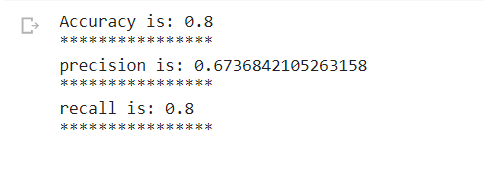

NaiveBayes for sentiment:

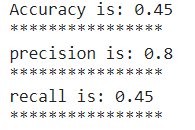

According to the above results, the Logistic regression algorithm provides a better result for predicting sentiment.

Logistic regression for keyword:

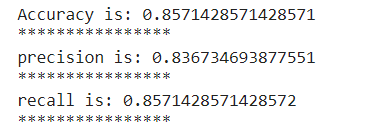

NaiveBayse for keyword:

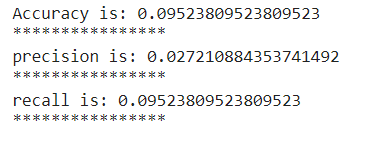

According to the above results, the Logistic regression algorithm provides a better result for predicting keyword. The results showed that the accuracy of the logistic regression model in both sentiment and hashtag prediction was higher than NiveBayse: 0.8 and 0.85. So logistic regression model was used.

Here, two functions were written for **sentiment** detection and **hashtag** detection, each of which includes all the steps mentioned in the previous section.

As mentioned, logistic regression machine learning algorithm is used and the created model is saved. When using this function, it is checked that if there is a model, it should be loaded, otherwise, the algorithm should be executed from the beginning.

In [ ]:
#sentiment detection

def ml_process_sentiment (content , is_retrain = False)

    from pyspark.ml.evaluation import BinaryClassificationEvaluator
    from pyspark.ml.classification import LogisticRegression
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml.classification import LogisticRegressionModel
    from pyspark.ml.feature import StringIndexer
    from pyspark.ml.feature import VectorAssembler
    import pandas as pd
    import pyarrow as pa
    import pyarrow.parquet as pq

     tweets_df = pd.DataFrame(content)
    # Convert pandas DataFrame to PyArrow Table
    table = pa.Table.from_pandas(tweets_df)
    # Write the PyArrow Table to Parquet format
    pq.write_table(table, 'data.parquet')
    # Read the Parquet file into a PySpark DataFrame
    df_spark = spark.read.parquet('data.parquet')

    df_spark = df_spark.withColumn('ml_sentiment_result',lit(''))

    tweet_spark_sentiment = df_spark


    tweet_spark_sentiment = df_spark.drop("hashtags")

    all_data=['id','user_id','user_name','user_display_name','text','lat','long',\
            'location_name','like_count','retweet_count','lang','created_at',\
            'preprocess_text','processed_text','sentiment_status','ml_sentiment_result','ml_keyword_result']

        for col in all_data:
            outCol='i_'+col
            tweet_spark_sentiment=tweet_spark_sentiment.drop(outCol)
            tweet_spark_sentiment = StringIndexer(inputCol=col,outputCol=outCol).fit(tweet_spark_sentiment).transform(tweet_spark_sentiment)

    tweet_spark_sentiment = tweet_spark_sentiment.drop('id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status','ml_sentiment_result','ml_keyword_result')

    vecAssembler = VectorAssembler(inputCols=['i_id','i_user_id','i_user_name','i_user_display_name','i_text','i_lat','i_long',\
            'i_location_name','i_like_count','i_retweet_count','i_lang','i_created_at',\
            'i_preprocess_text','i_processed_text','i_sentiment_status','i_ml_sentiment_result','i_ml_keyword_result'],\
                                  outputCol="features")
    vector_tweet_sentiment = vecAssembler.transform(tweet_spark_sentiment)

    predictions = {}

      if is_retrain:
        loaded_model = LogisticRegressionModel.load("Logistic_model_sentiment")
        train_reg_s, test_reg_s = vector_tweet_sentiment.randomSplit([0.8, 0.2], seed=1)
        lrn_s = loaded_model.fit(train_reg_s)
        tst_reg_s = lrn_s.transform(test_reg_s)
      else:
        lr_s = LogisticRegression(featuresCol='features',labelCol="i_sentiment_status",regParam=1.0)
        train_reg_s, test_reg_s = vector_tweet_sentiment.randomSplit([0.8, 0.2], seed=1)
        lrn_s = lr_s.fit(train_reg_s)
        tst_reg_s = lrn_s.transform(test_reg_s)
        is_retrain = True

    # save model
    lrn_s.write().overwrite().save("Logistic_model_sentiment")

    predictions = tst_reg_s.select(tst_reg_s["prediction"])

    return predictions


In [ ]:
#keyword detection

def ml_process_keyword (content)

    from pyspark.ml.evaluation import BinaryClassificationEvaluator
    from pyspark.ml.classification import LogisticRegression
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml.classification import LogisticRegressionModel
    from pyspark.ml.feature import StringIndexer
    from pyspark.ml.feature import VectorAssembler
    import pandas as pd
    import pyarrow as pa
    import pyarrow.parquet as pq


     tweets_df = pd.DataFrame(content)
    # Convert pandas DataFrame to PyArrow Table
    table = pa.Table.from_pandas(tweets_df)
    # Write the PyArrow Table to Parquet format
    pq.write_table(table, 'data.parquet')
    # Read the Parquet file into a PySpark DataFrame
    df_spark = spark.read.parquet('data.parquet')

    df_spark = df_spark.withColumn('ml_keyword_result',lit(''))
    tweet_spark_keyword = df_spark

    tweet_spark_keywords = tweet_spark_keyword.select(tweet_spark_keyword.id,tweet_spark_keyword.user_id,tweet_spark_keyword.user_name,\
                   tweet_spark_keyword.user_display_name,tweet_spark_keyword.text,tweet_spark_keyword.lat,\
                   tweet_spark_keyword.long,tweet_spark_keyword.location_name,tweet_spark_keyword.like_count,\
                   tweet_spark_keyword.retweet_count,tweet_spark_keyword.lang,tweet_spark_keyword.created_at,\
                   tweet_spark_keyword.preprocess_text,tweet_spark_keyword.processed_text,tweet_spark_keyword.sentiment_status,\
                   tweet_spark_keyword.ml_sentiment_result,tweet_spark_keyword.ml_keyword_result,\
                   explode(tweet_spark_keyword.hashtags))

    tweet_spark_keywords = tweet_spark_keywords.withColumnRenamed('col', 'hashtags')

    all_data_k=['id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status',\
          'ml_sentiment_result','ml_keyword_result','hashtags']
        for col in all_data_k:
            outCol='i_'+col
            tweet_spark_keywords = tweet_spark_keywords.drop(outCol)
            tweet_spark_keywords = StringIndexer(inputCol=col,outputCol=outCol).fit(tweet_spark_keywords).transform(tweet_spark_keywords)
    tweet_spark_keywords = tweet_spark_keywords.drop('id','user_id','user_name','user_display_name','text','lat','long',\
          'location_name','like_count','retweet_count','lang','created_at',\
          'preprocess_text','processed_text','sentiment_status','hashtags','ml_sentiment_result','ml_keyword_result')

    vecAssembler_k = VectorAssembler(inputCols=['i_id','i_user_id','i_user_name','i_user_display_name','i_text','i_lat','i_long',\
          'i_location_name','i_like_count','i_retweet_count','i_lang','i_created_at',\
          'i_preprocess_text','i_processed_text','i_sentiment_status','i_hashtags','i_ml_sentiment_result','i_ml_keyword_result'],\
                               outputCol="features")
    vector_tweet_keyword = vecAssembler_k.transform(tweet_spark_keywords)

    if is_retrain:
        loaded_model = LogisticRegressionModel.load("Logistic_model_keyword")
        train_reg_k, test_reg_k = vector_tweet_keyword.randomSplit([0.8, 0.2], seed=1)
        lrn_k = loaded_model.fit(train_reg_k)
        tst_reg_k = lrn_k.transform(test_reg_k)
      else:
        lr_k = LogisticRegression(featuresCol='features',labelCol="i_hashtags",regParam=1.0)
        train_reg_k, test_reg_k = vector_tweet_keyword.randomSplit([0.8, 0.2], seed=1)
        lrn_k = loaded_model.fit(train_reg_k)
        tst_reg_k = lrn_k.transform(test_reg_k)
        is_retrain = True

     # save model
    lrn_s.write().overwrite().save("Logistic_model_keyword")

    predictions = tst_reg_k.select(tst_reg_k["prediction"])

    return predictions

# **Step 5: Data Storing or Updating in Cassandra**

Here we define functions to store the final processed data and machine learning results in Apache Cassandra.

In [ ]:
def save_processed_tweets_cassandra(data_object, db_name = None, is_json = False):

  import json
  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "processed_data"

  item = ""

  if is_json == True:
    item = json.loads(data_object)
  else:
    item = data_object


  cassandra = get_cassandra_auth()
  # create a single cluster
  cassandra.execute(f"CREATE KEYSPACE IF NOT EXISTS {db_name_keyspace} WITH " +
                    "replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

  # select a keyspace to perform the tasks
  cassandra.keyspace = db_name_keyspace

  # create a table for tweets
  query = f"CREATE TABLE IF NOT EXISTS {db_name_keyspace}.processed_tweets (\
                                        id bigint,\
                                        tweet text,\
                                        user_id bigint,\
                                        user_name text,\
                                        user_display_name text,\
                                        hashtags text,\
                                        like_count bigint,\
                                        retweet_count bigint,\
                                        location text,\
                                        preprocess_tweet text,\
                                        processed_tweet text,\
                                        sentiment text,\
                                        created_date Timestamp,\
                                        PRIMARY KEY (user_name, created_date, id))\
                                        WITH CLUSTERING ORDER BY (created_date DESC);"

  cassandra.execute(query)

  # create insert query template
  raw_tweet_insert = f"INSERT INTO {db_name_keyspace}.processed_tweets (id, tweet, user_id, user_name, user_display_name, hashtags, like_count, retweet_count, location, preprocess_tweet, processed_tweet, sentiment, created_date) \
                        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, 'N\A', %s, %s, %s, %s)"


  cassandra.execute(raw_tweet_insert,
                    (item["id"], item["text"], item["user_id"], item["user_name"], item["user_display_name"], ", ".join(item["hashtags"]), item["like_count"], item["retweet_count"], item["preprocess_text"], item["processed_text"], item["sentiment_status"], item["created_at"]))

  #print(f"The entry of {count} data is inserted into processed_tweets.")

  if False:
    # get the description of table
    result = cassandra.execute(f"DESCRIBE TABLE {db_name_keyspace}.processed_tweets")
    print(result)

In [ ]:
def drop_processed_tweets_cassandra(db_name = None):
  import cassandra
  from cassandra.cluster import Cluster

  db_name_raw_data = "processed_data"

  cassandra = get_cassandra_auth()

  # select a keyspace to perform the tasks
  #cassandra.keyspace = db_name_raw_data

  # drop a table
  result = cassandra.execute(f"DROP TABLE IF EXISTS {db_name_raw_data}.processed_tweets;")
  print(result)

In [ ]:
def get_saved_processed_tweets():

  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "processed_data"

  cassandra = get_cassandra_auth()
  spark = init_pyspark()

  # query to retrive stored data
  result = cassandra.execute(f"SELECT * FROM {db_name_keyspace}.processed_tweets")

  spark = init_pyspark()

  if not result:
    print("There is no result.")
  else:
    result_df = spark.createDataFrame([row for row in result])
    print(f"{result_df.count()} items found.")
    result_df.show()

In [ ]:
def save_ml_sentiment_tweets_cassandra(data_object, db_name = None, is_json = False):

  import json
  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "ml_sentiment"

  item = ""

  if is_json == True:
    item = json.loads(data_object)
  else:
    item = data_object


  cassandra = get_cassandra_auth()
  # create a single cluster
  cassandra.execute(f"CREATE KEYSPACE IF NOT EXISTS {db_name_keyspace} WITH " +
                    "replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

  # select a keyspace to perform the tasks
  cassandra.keyspace = db_name_keyspace

  # create a table for tweets
  query = f"CREATE TABLE IF NOT EXISTS {db_name_keyspace}.ml_sentiment_tweets (\
                                        id bigint,\
                                        tweet text,\
                                        user_id bigint,\
                                        user_name text,\
                                        user_display_name text,\
                                        like_count bigint,\
                                        retweet_count bigint,\
                                        location text,\
                                        preprocess_tweet text,\
                                        processed_tweet text,\
                                        sentiment text,\
                                        created_date Timestamp,\
                                        ml_sentiment_label text,\
                                        PRIMARY KEY (user_name, created_date, id))\
                                        WITH CLUSTERING ORDER BY (created_date DESC);"

  cassandra.execute(query)

  # create insert query template
  raw_tweet_insert = f"INSERT INTO {db_name_keyspace}.ml_sentiment_tweets (id, tweet, user_id, user_name, user_display_name, like_count, retweet_count, location, preprocess_tweet, processed_tweet, sentiment, created_date, ml_sentiment_label) \
                        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, 'N\A', %s, %s, %s, %s)"


  cassandra.execute(raw_tweet_insert,
                    (item["id"], item["text"], item["user_id"], item["user_name"], item["user_display_name"], item["like_count"], item["retweet_count"], item["preprocess_text"], item["processed_text"], item["sentiment_status"], item["created_at"], item["ml_sentiment_label"]))


  if False:
    # get the description of table
    result = cassandra.execute(f"DESCRIBE TABLE {db_name_keyspace}.ml_sentiment_tweets")
    print(result)

In [ ]:
def save_ml_keyword_tweets_cassandra(data_object, db_name = None, is_json = False):

  import json
  import cassandra
  from cassandra.cluster import Cluster

  db_name_keyspace = "ml_keyword"

  item = ""

  if is_json == True:
    item = json.loads(data_object)
  else:
    item = data_object


  cassandra = get_cassandra_auth()
  # create a single cluster
  cassandra.execute(f"CREATE KEYSPACE IF NOT EXISTS {db_name_keyspace} WITH " +
                    "replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

  # select a keyspace to perform the tasks
  cassandra.keyspace = db_name_keyspace

  # create a table for tweets
  query = f"CREATE TABLE IF NOT EXISTS {db_name_keyspace}.ml_keyword_tweets (\
                                        id bigint,\
                                        tweet text,\
                                        user_id bigint,\
                                        user_name text,\
                                        user_display_name text,\
                                        like_count bigint,\
                                        retweet_count bigint,\
                                        location text,\
                                        preprocess_tweet text,\
                                        processed_tweet text,\
                                        sentiment text,\
                                        created_date Timestamp,\
                                        ml_keyword_label text,\
                                        PRIMARY KEY (user_name, created_date, id))\
                                        WITH CLUSTERING ORDER BY (created_date DESC);"

  cassandra.execute(query)

  # create insert query template
  raw_tweet_insert = f"INSERT INTO {db_name_keyspace}.ml_keyword_tweets (id, tweet, user_id, user_name, user_display_name, hashtags, like_count, retweet_count, location, preprocess_tweet, processed_tweet, sentiment, created_date, ml_keyword_label) \
                        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, 'N\A', %s, %s, %s, %s)"


  cassandra.execute(raw_tweet_insert,
                    (item["id"], item["text"], item["user_id"], item["user_name"], item["user_display_name"], item["hashtags"], item["like_count"], item["retweet_count"], item["preprocess_text"], item["processed_text"], item["sentiment_status"], item["created_at"], item["ml_keyword_label"]))


  if False:
    # get the description of table
    result = cassandra.execute(f"DESCRIBE TABLE {db_name_keyspace}.ml_keyword_tweets")
    print(result)

# **Step 6: Transferring Data to Elasticsearch**

As said, most of the data exchange structure with Elasticsearch is JSON based. Since this data exchange is done on the specified zone, we need to specify and define an index zone in Elasticsearch, which will be useed to execute for some tasks later. So we define the following variable.

In [ ]:
index_name = "twitter_realtime"

In this part, we will import the data into Elasticsearch using the `index_name` that we have created.

Meantime, Elasticsearch automatically constructs the index and mapping when we index a document if they don’t already exist. The data mapping specifies the index’s structure, down to the data types used in the fields of the documents, which determines how fields are indexed and stored. While Elasticsearch auto-detects the schema based on the kind of JSON value through a process known as dynamic mapping, it is also possible to set this mapping statically.


This code will create a new index called `twitter_realtime` using the cluster we set up earlier.



In [ ]:
def create_index_elastic(index_name = "twitter_realtime"):
  from elasticsearch import helpers, Elasticsearch
  mappings = {
      "properties": {
        "created_at": {
          "type": "date",
          "format": "YYYY-MM-dd HH:mm:ss"
        },
        "hashtags": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "id": {
          "type": "long"
        },
        "lang": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "lat": {
          "type": "long"
        },
        "like_count": {
          "type": "long"
        },
        "location_name": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "long": {
          "type": "long"
        },
        "preprocess_text": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "processed_text": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "retweet_count": {
          "type": "long"
        },
        "sentiment_status": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "text": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "user_display_name": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        },
        "user_id": {
          "type": "long"
        },
        "user_name": {
          "type": "text",
          "fields": {
            "keyword": {
              "type": "keyword",
              "ignore_above": 256
            }
          }
        }
      }
    }

  elasticsearch_auth = get_elasticsearch_auth()

  #check for exist index
  index_exists = elasticsearch_auth.indices.exists(index=index_name)
  if index_exists == True :
      print("Index is existed")
  elif index_exists == False :
      elasticsearch_auth.indices.create(index = index_name, mappings = mappings)
      print("Index was created")

In [ ]:
#create_index_elastic()

We use this function to send and store processed information in Elasticsearch.

In [ ]:
def save_to_elastic(content, index_name, doc_type = "index", is_bulk = False):

  import json
  from elasticsearch import helpers, Elasticsearch

  items = ""
  documents_dump = []

  if is_bulk:
    items = json.loads(content)
  else:
    items = [content]

  for item in items:
      document = {
          "_op_type": doc_type,
          "_index": index_name,
          "_source": item
          }

  documents_dump.append(document)

  elasticsearch_auth = get_elasticsearch_auth()

  helpers.bulk(elasticsearch_auth, documents_dump)

In [ ]:
# hit the contents of Elasticsearch index
elasticsearch_auth = get_elasticsearch_auth()
response = elasticsearch_auth.search(index = index_name, query={"match_all": {}})
response

ObjectApiResponse({'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 8, 'relation': 'eq'}, 'max_score': 1.0, 'hits': [{'_index': 'twitter_realtime', '_id': 'sWy0Z4kBBdl5vjD-Pumy', '_score': 1.0, '_source': {'id': 1681084269442002946, 'user_id': 1380327464254181382, 'user_name': 'bitosmo', 'user_display_name': 'Bhzadfarahmnd', 'text': 'اگر #Bitcoin آغاز کنه، بازم همیشه در دسترسه؛', 'hashtags': ['Bitcoin'], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 0, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-17 23:31:37'}}, {'_index': 'twitter_realtime', '_id': 'smy0Z4kBBdl5vjD-QOk0', '_score': 1.0, '_source': {'id': 1681054130419163140, 'user_id': 1638169922726502400, 'user_name': 'NuIb22', 'user_display_name': 'Anthony | FusionX Finance | Suiswap', 'text': 'RT @Mksh9978: 💮 #تست\u200cنت همراه با #ایردراپ تایید شده از @VelarBTC تا 20 جولای تمدید شده.\n\n#DeFi #VelarFarming #Bitcoin #Velar https://t

# **Step 7: Kibana Dashboard**

Kibana is a free and open source frontend application that sits on top of the Elastic Stack, providing search and data visualization capabilities for data indexed in Elasticsearch.
Kibana also acts as the user interface for monitoring, managing, and securing an Elastic Stack cluster, as well as the centralized hub for built-in solutions developed on the Elastic Stack for observability, security, and enterprise search applications.

We can emplooye Kibana to explore, analyze, and visualize data in various ways, such as charts, maps, tables, and more. We can also create dashboards that combine multiple visualizations and filters to display the full picture of data and share them with others.

Dashboards in Kibana are collections of searches and visualizations that show data from Elasticsearch in different ways. We can use them to explore data, discover insights, and act on our findings. To make a dashboard in Kibana, we need to index data into Elasticsearch and create a data view that specifies the fields and time range of data. We can then add various types of panels to our dashboard, such as maps, charts, tables, and more. We can also adjust the layout and look of our dashboard, and save it for future use or sharing.

We can go to the dashboard page from the main menu in Kibana, where we can start a new dashboard or open an existing one. We can also use the dashboard toolbar to add more panels, filters, drilldowns, and other options to improve our dashboard.

In the following, we show some examples of dashboards made in Kibana.

**Word Cloud**

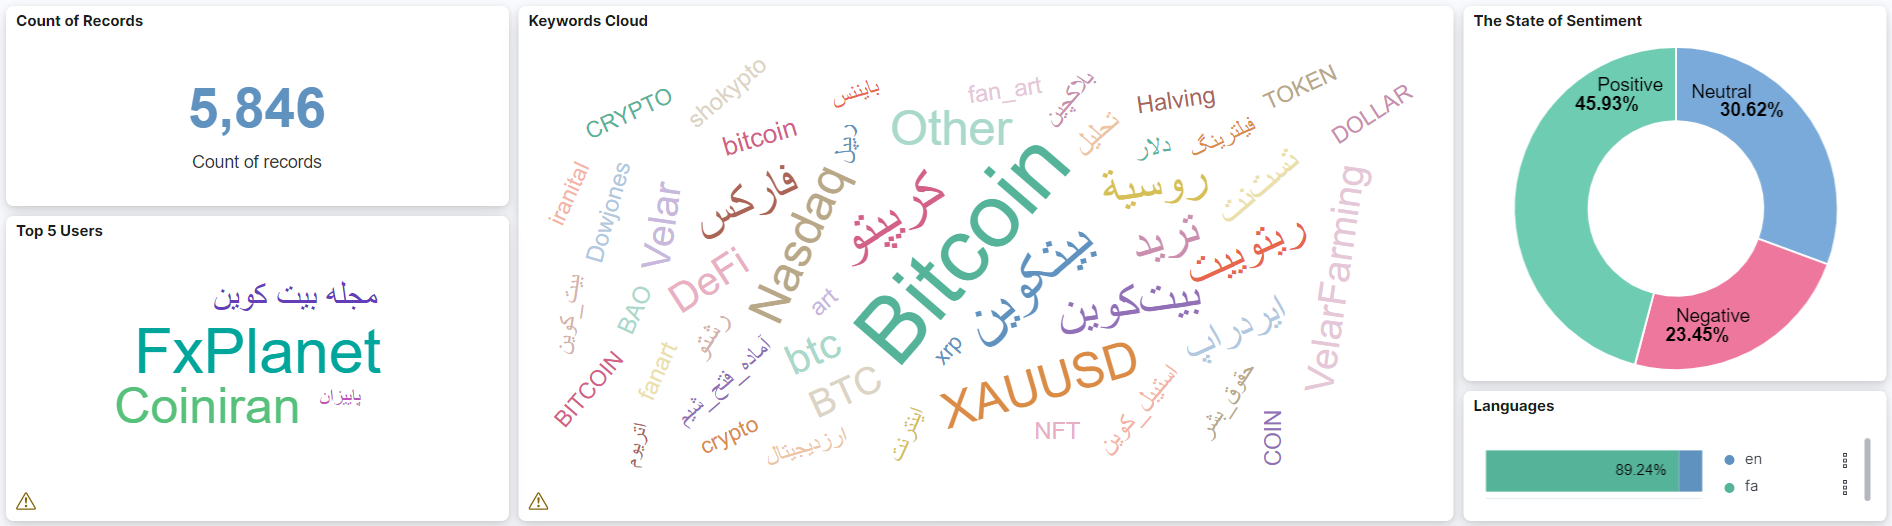

**Posts per Hour**

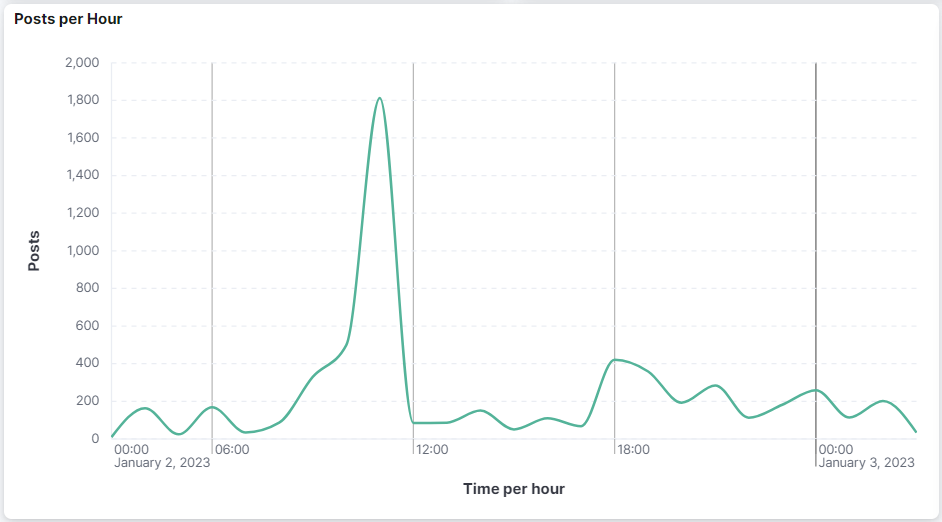

**Top Hashtags per Hour**

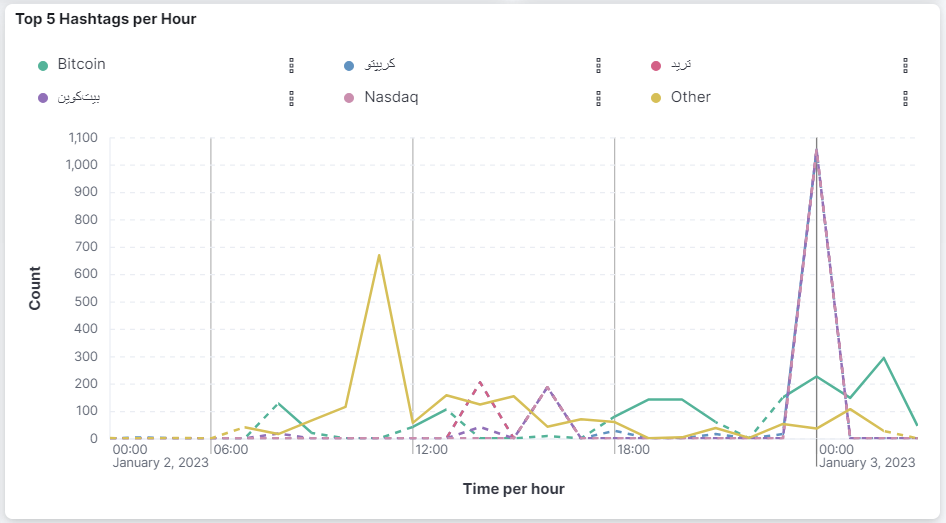

**Last Posts**

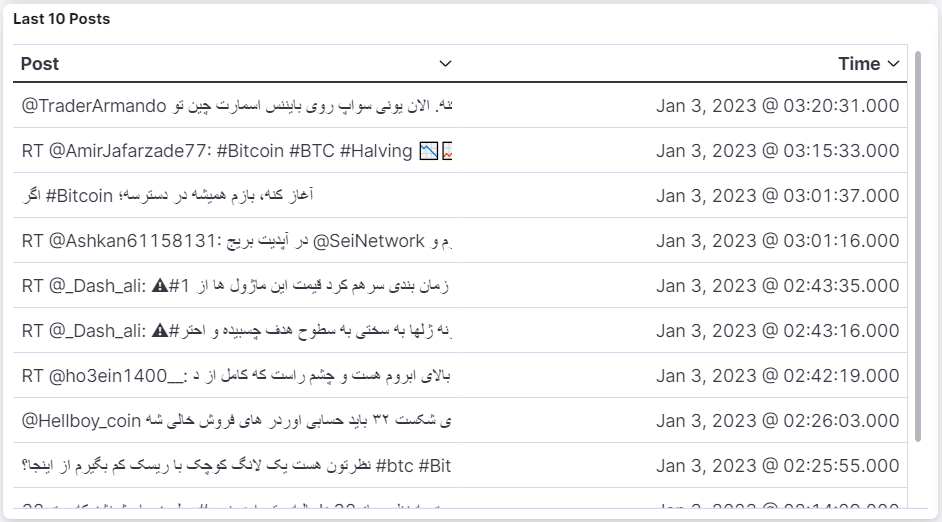

**Posts based on Hashtags or Keywords**

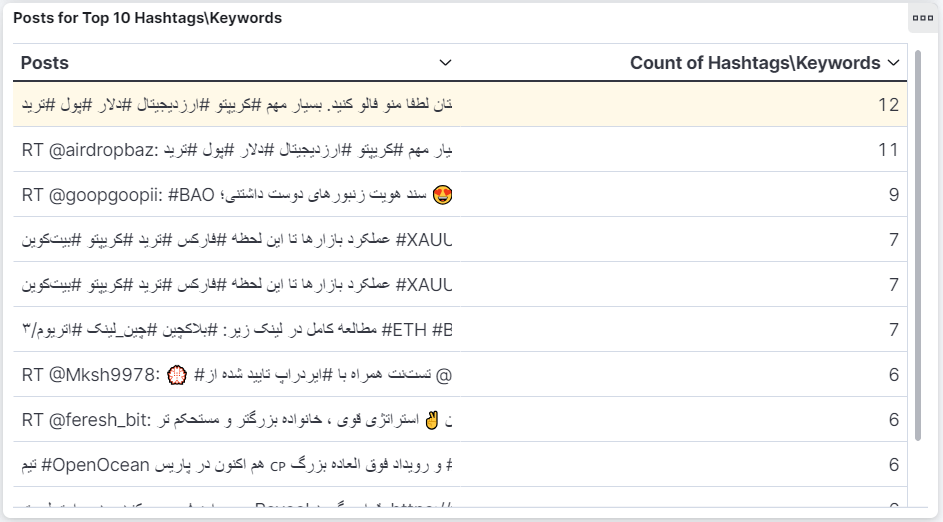

**Posts Contain a term (example for Bitcoin)**

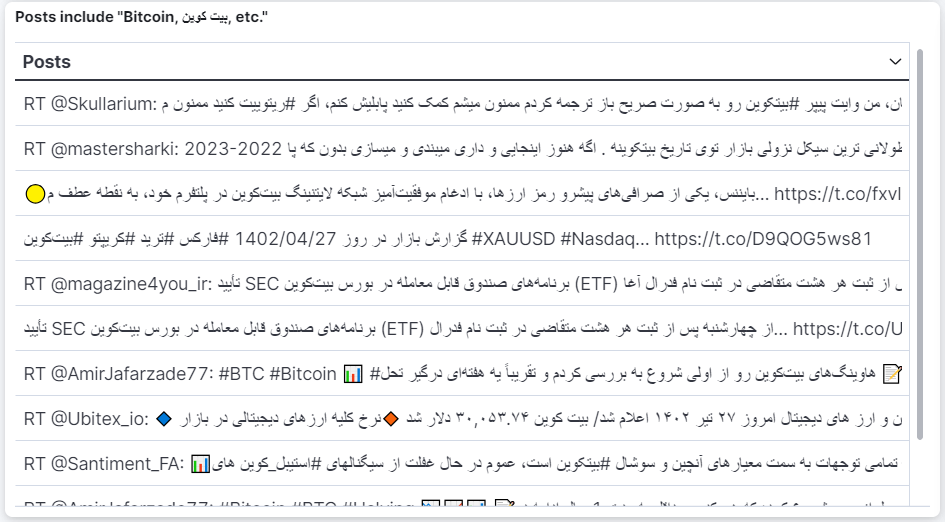

**Top Shared Posts**

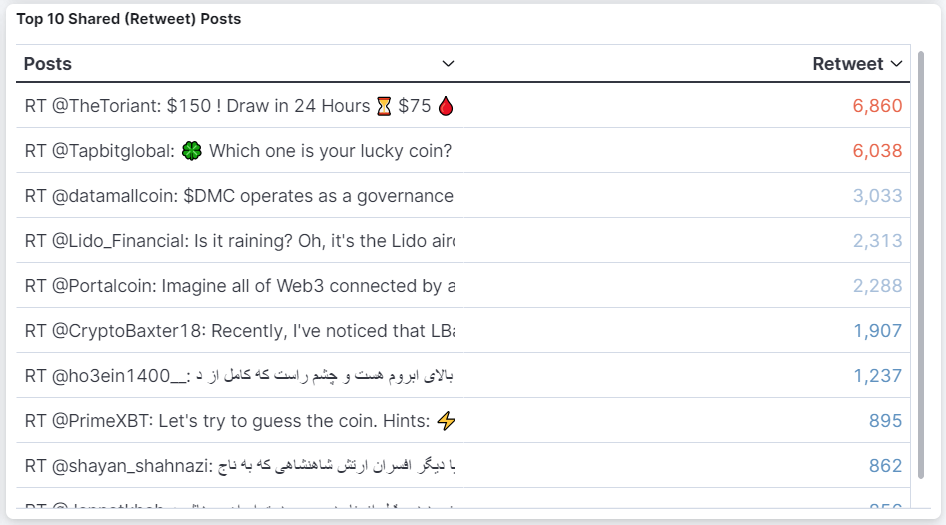

# **Step 8: Data Streaming**

Real-time data is the need of the hour for businesses to make timely decisions, especially in cases of fraud detection or customer behavior analysis. Relying on traditional batch processing is not effective now. Data streaming is a powerful technology that provides organizations with the ability to process and analyze large amounts of data in real time.

Data streaming is the process of transmitting a continuous flow of data, also known as streams, typically fed into stream processing software to derive valuable insights. A data stream consists of a series of data elements ordered in time.





Using Spark Streaming we can read from Kafka topic and write to Kafka topic in text, csv, and json formats, Next, we will show how to stream from Kafka messages in json format using from_json() and to_json() SQL functions.



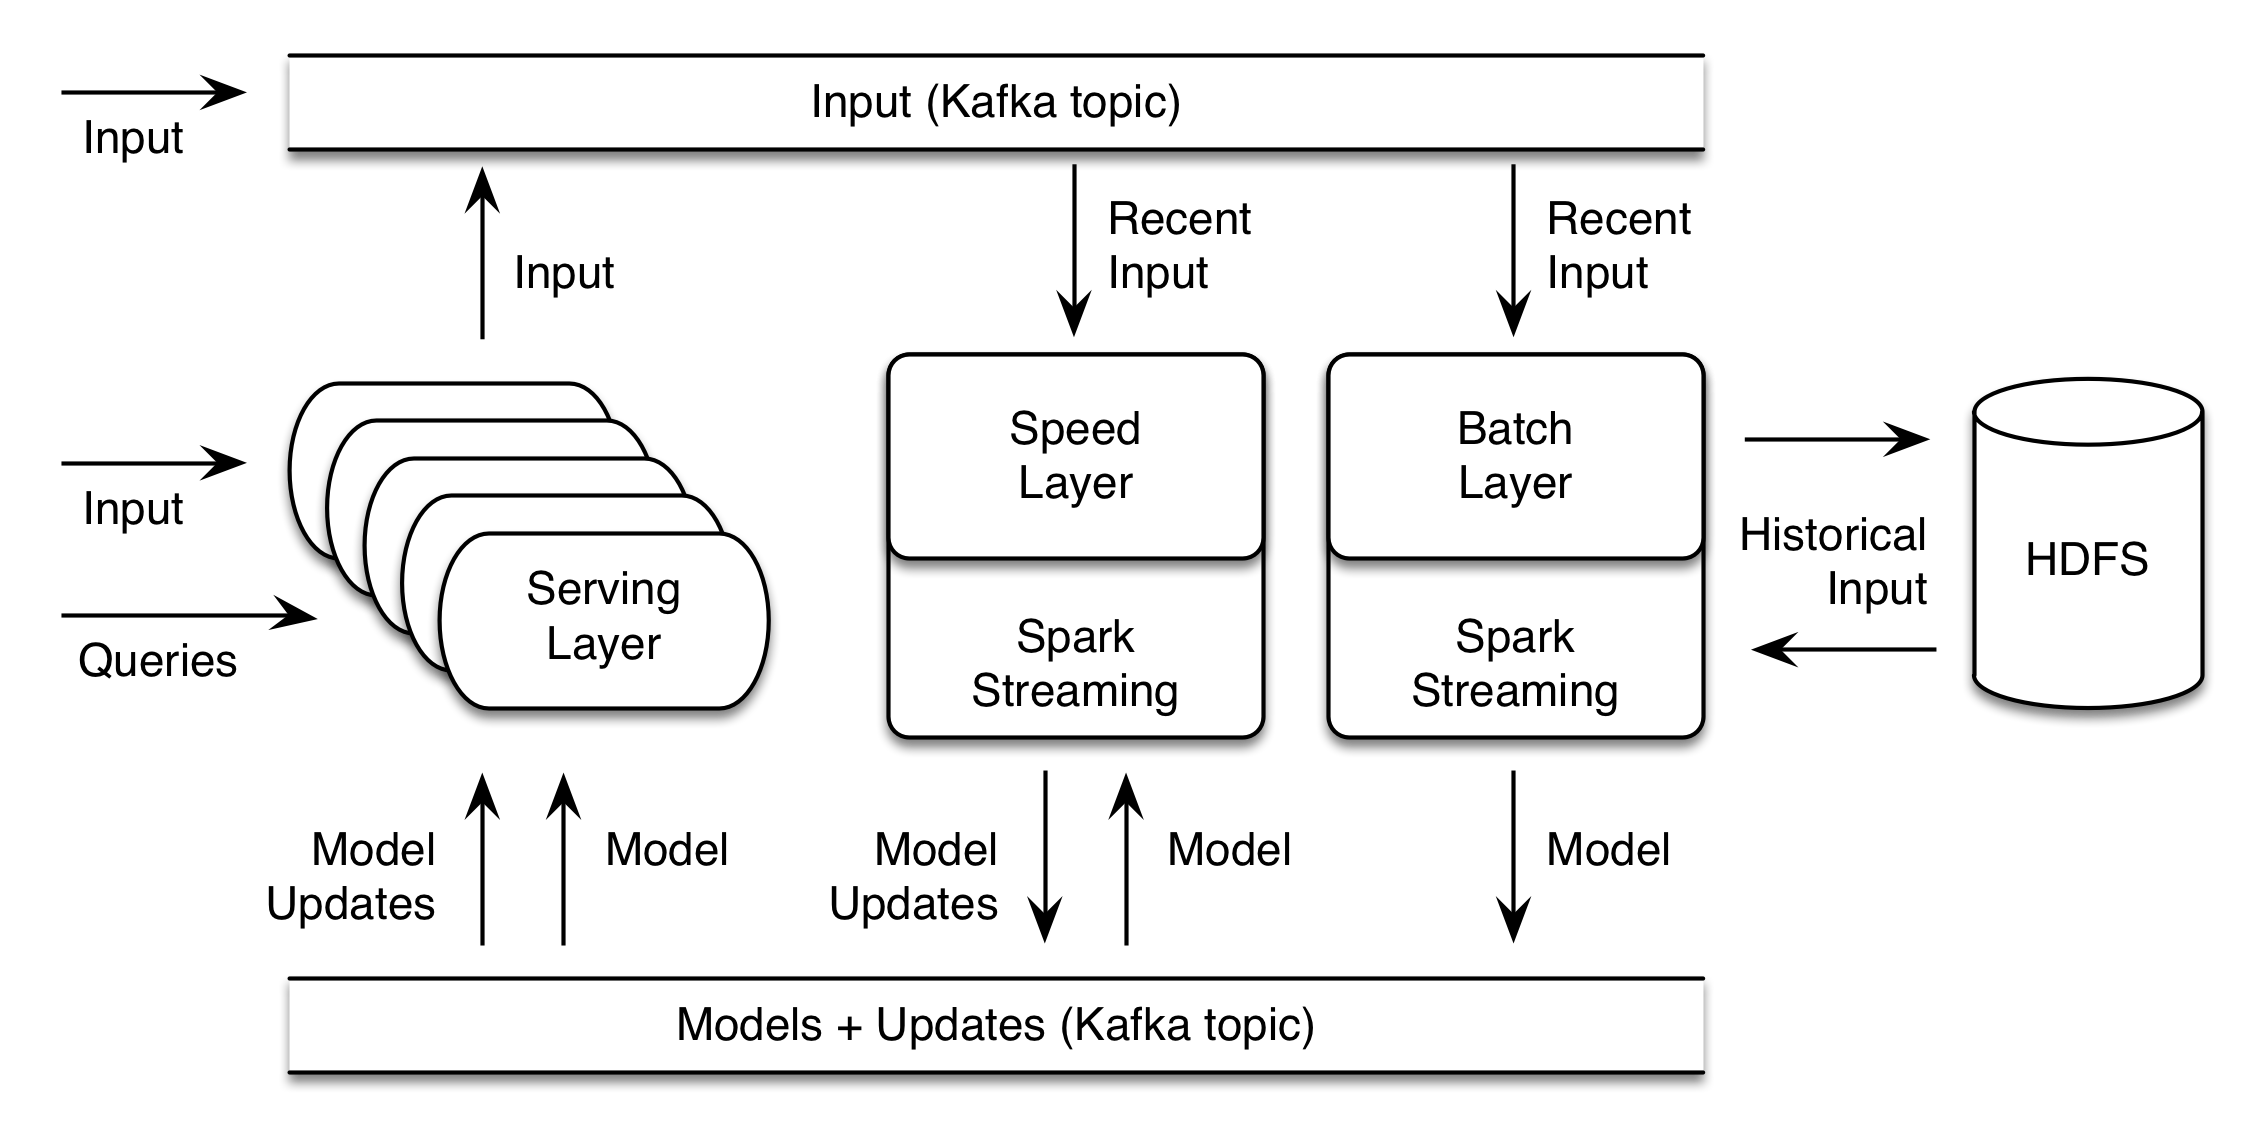

##**Streaming Producer**

We set the necessary setting to make streaming data and then start sending each data object within the json through the Kafka topics. In order to, we define a function that sends the data fetched from Twitter on the Kafka channel and the desired topic-name.

In [ ]:
 def run_kafka_producer():

  import tweepy
  from tweepy.streaming import Stream
  from tweepy import OAuthHandler, API, Stream
  from kafka import KafkaProducer
  import json
  import json
  import time
  from datetime import datetime, timezone

   #kafka_topic_name =""


  class TwitterStreamListener(Stream):

      def on_data(self, data):
          processed_tweet = process_tweet(data)
          save_raw_tweets_cassandra(processed_tweet, is_json = True)
          kafka_producer.send(kafka_topic_name, processed_tweet)
          print(processed_tweet)
          return True

      def on_error(self, status):
          print (status)

      def start(self, search_term=None):
        # filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
        self.filter(track=["bitcoin"], languages=["fa"])



  kafka_producer = KafkaProducer(bootstrap_servers = kafka_bootstrap_servers,
                           value_serializer = lambda x: json.dumps(x, default=str).encode("utf-8"))

  raw_online_tweets_json = fetch_tweets(count = 500, keywords="NFT", lang = "بش")

  for tweet in raw_online_tweets_json:
    processed_tweet = process_tweet(tweet)
    save_raw_tweets_cassandra(processed_tweet, is_json = True)
    print("Message to be send: ", processed_tweet)
    kafka_producer.send(kafka_topic_name, processed_tweet)

    #time.sleep(1)
  kafka_producer.flush()

  twitter_auth = get_twitter_auth()

  # creating an object from Twitter API client
  #twitter_client = tweepy.API(twitter_auth)
  # handle Twitter authetification and the connection to Twitter Streaming API
  #twitter_auth = OAuthHandler(consumer_key, consumer_secret)
  #twitter_auth.set_access_token(access_token, access_token_secret)
  #stream = Stream(twitter_auth.consumer_key, twitter_auth.consumer_secret, twitter_auth.access_token, twitter_auth.access_token_secret)
  #twitter_stream = TwitterStreamListener(twitter_auth.consumer_key, twitter_auth.consumer_secret, twitter_auth.access_token, twitter_auth.access_token_secret)
  #stream = Stream(auth=twitter_auth, listener=listener)
  #twitter_stream.filter(track=["#worldkidnessday"], languages=["en"])
  """

  try:
    print("Start streaming.")
    #twitter_stream.filter(languages=["en"])
    twitter_stream.start()
  except KeyboardInterrupt:
    print("Stopped.")
  finally:
    print("Done.")
    twitter_stream.disconnect()
    """


##**Streaming Consumer**

Now that Kafka producer was set up, we proceed with configuring spark streaming to act as a consumer.

All the data in a Kafka topic is stored in the format of `KEY: VALUE`. Along with key and value, other metadata like timestamp is also stored in the Kafka topic. To extract the actual information from the Kafka topic we need to get the value from the stored JSON.

In [ ]:
 def run_kafka_consumer():

  from kafka import KafkaConsumer
  import json
  from datetime import datetime
  from datetime import timezone

  kafka_consumer = KafkaConsumer(kafka_topic_name, bootstrap_servers = kafka_bootstrap_servers,
                                  auto_offset_reset="earliest", #=> earliest, latest
                                  max_poll_records=100,
                                  enable_auto_commit = False)


  for message in kafka_consumer:
    # deserialize the string from the producer since it comes in
    content = json.loads(json.loads(message.value))
    print("Received message: ", content)
    analysis_result = analyze_text(content["text"], content["lang"])
    # appending the data
    content.update(json.loads(analysis_result))
    # save to Elasticsearch index
    save_to_elastic(content, index_name)
    # save to processed tweets database
    save_processed_tweets_cassandra(content)
    # send data to ML_Models
    sentiment_result = ml_process_sentiment (content , is_retrain = False)
    keyword_resul = ml_process_keyword (content)
    # save result of ML to cassandra
    save_ml_sentiment_tweets_cassandra(sentiment_result)
    save_ml_keyword_tweets_cassandra(keyword_resul)

Since we have to read a real-time data stream from a Kafka topic its important to connect Spark Streaming to a Kafka Topic



In [ ]:
def kafka_stream():
  from pyspark import SparkContext, SparkConf
  from pyspark.streaming import StreamingContext
  from pyspark.streaming.kafka import KafkaUtils
  from pyspark.sql import Row, SQLContext
  # get current Streaming context
  sc = spark.sparkContext
  # get data from stream every 30 secs
  ssc = StreamingContext(sc, 30)

  kafka_streamer = KafkaUtils.createStream(ssc, "YourHostWithKafka:2181", "consumer-group", {"tweets": 1})
  tweets = kafka_streamer.map(lambda x: json.loads(message.value))

  # process each DStream
  tweets.foreachRDD(process_qeue)

  # start Streaming Context
  ssc.start()
  ssc.awaitTermination()

## *RUN TEST*

In [ ]:
run_kafka_producer()
run_kafka_consumer()

# **Step 9: Run App**

In order for the program to run in a coordinated and integrated manner, we define the following main functions. `install_prerequisites()` function installs the requirements. `init_services()` initializes programs. For the final execution, `runp_app()` is executed.

In [ ]:
def install_prerequisites():
  install_java()
  install_pyspark()
  install_pyarrow()
  install_kafka()
  install_cassandra()
  install_elastic()

In [ ]:
def init_services():
  init_pyspark()
  init_kafka()
  init_cassandra()
  init_elastic()
  init_nlp_core()

In [ ]:
def check_healthy():
  get_cassandra_auth()
  get_elasticsearch_auth()

In [ ]:
def run_app():
  run_kafka_producer()
  run_kafka_consumer()

## **Install Prerequisites**

In [ ]:
install_prerequisites()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
kafka_2.13-3.4.0/
kafka_2.13-3.4.0/LICENSE
kafka_2.13-3.4.0/NOTICE
kafka_2.13-3.4.0/bin/
kafka_2.13-3.4.0/bin/kafka-delete-records.sh
kafka_2.13-3.4.0/bin/trogdor.sh
kafka_2.13-3.4.0/bin/connect-mirror-maker.sh
kafka_2.13-3.4.0/bin/kafka-console-consumer.sh
kafka_2.13-3.4.0/bin/kafka-consumer-perf-test.sh
kafka_2.13-3.4.0/bin/kafka-log-dirs.sh
kafka_2.13-3.4.0/bin/kafka-metadata-quorum.sh
kafka_2.13-3.4.0/bin/zookeeper-server-stop.sh
kafka_2.13-3.4.0/bin/kafka-verifiable-consumer.sh
kafka_2.13-3.4.0/bin/kafka-features.sh
kafka_2.13-3.4.0/bin/kafka-acls.sh
kafka_2.13-3.4.0/bin/zookeeper-server-start.sh
kafka_2.13-3.4.0/bin/kafka-server-stop.sh
kafka_2.13-3.4.0/bin/kafka-configs.sh
kafka_2.13-3.4.0/bin/kafka-reassign-partitions.sh
kafka_2.13-3.4.0/bin/kafka-leader-election.sh
kafka_2.13-3.4.0/bin/kafka-producer-perf-test.sh
kafka_2.13-3.4.0/bin/kafka-transactions.sh
k

## **Initialize Services**

In [ ]:
init_services()

Waiting for 10 secs until kafka and zookeeper services are up and running
root        2005       1  9 07:46 ?        00:00:01 /usr/lib/jvm/java-8-openjdk-amd64/bin/java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xloggc:/content/kafka/bin/../logs/zookeeper-gc.log -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCDateStamps -XX:+PrintGCTimeStamps -XX:+UseGCLogFileRotation -XX:NumberOfGCLogFiles=10 -XX:GCLogFileSize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka/bin/../logs -Dlog4j.configuration=file:./kafka/bin/../config/log4j.properties -cp /content/kafka/bin/../libs/activation-1.1.1.jar:/content/kafka/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka/bin/../libs/argparse4j-0.7.0.jar:/content/kafka/bin/../libs/audience-annotations-0.5.0

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52560 sha256=4911054a187203634d0d3b1d8e1e90ad5d9636faffe4f56b7da0adff07e9edab
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.11-cp310-cp310-linux_x86_64.whl size=1855526 sha256=d131aea1e47f2054a0303b29c0dc5d58f2f98bf8a1d531d2c4cf8b2bdf215f4e
  Stored in directory: /root/.cache/pip/wheels/67/c3/00/2176cc05d3ea22935a9c78f1034b1a3e3697ef11ffb5cbe2f5
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.2 MB/s eta 0:

## **Start Stream**

In [ ]:
run_app()

Status(_api=<tweepy.api.API object at 0x7c5375669a20>, _json={'created_at': 'Wed Jul 19 03:11:33 +0000 2023', 'id': 1681502004714020865, 'id_str': '1681502004714020865', 'text': 'چندنفری منو تو گروه های تلگرامی addکردند و بلافاصله چندتا داف خارجی اومدن پی وی  که های سووییتی هاو آر یووو ....\nمن… https://t.co/MLRezLOj2e', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MLRezLOj2e', 'expanded_url': 'https://twitter.com/i/web/status/1681502004714020865', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'fa', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 880535139922710529, 'id_str': '880535139922710529', 'name': 'پایی

Message to be send:  {"id": 1681437673456824320, "user_id": 266451688, "user_name": "Mrcryptotracker", "user_display_name": "Mr. CryptoTracker®️", "text": "نظرتون هست یک لانگ کوچک با ریسک کم بگیرم از اینجا؟ \n\n#btc #Bitcoin https://t.co/aaiN2UWbWe", "hashtags": ["btc", "Bitcoin"], "lat": 0, "long": 0, "location_name": "Las Vegas, NV", "like_count": 9, "retweet_count": 0, "lang": "fa", "created_at": "2023-07-18 22:55:55"}
Message to be send:  {"id": 1681406052019912711, "user_id": 1647926222666465280, "user_name": "fxplanet_fa", "user_display_name": "FxPlanet", "text": "گزارش بازار در روز  1402/04/27\n\n                 #فارکس #ترید #کریپتو #بیت‌کوین\n             #XAUUSD #Nasdaq… https://t.co/D9QOG5ws81", "hashtags": ["فارکس", "ترید", "کریپتو", "بیت‌کوین", "XAUUSD", "Nasdaq"], "lat": 0, "long": 0, "location_name": "", "like_count": 1, "retweet_count": 0, "lang": "fa", "created_at": "2023-07-18 20:50:16"}
Message to be send:  {"id": 1681360737887813632, "user_id": 1330579700327075843, 

Message to be send:  {"id": 1681341674230804481, "user_id": 1632234350124191746, "user_name": "DargahiGuity", "user_display_name": "guity dargahi", "text": "@ghostshon Bitcoin استخراج کننده", "hashtags": [], "lat": 0, "long": 0, "location_name": "", "like_count": 0, "retweet_count": 0, "lang": "fa", "created_at": "2023-07-18 16:34:27"}
Message to be send:  {"id": 1681331066345324544, "user_id": 1637368663887036416, "user_name": "MRTR2023", "user_display_name": "mrtr8", "text": "RT @magazine4you_ir: تأیید SEC برنامه‌های صندوق قابل معامله در بورس بیت‌کوین (ETF) از چهارشنبه پس از ثبت هر هشت متقاضی در ثبت نام فدرال آغا…", "hashtags": [], "lat": 0, "long": 0, "location_name": "", "like_count": 0, "retweet_count": 1, "lang": "fa", "created_at": "2023-07-18 15:52:18"}
Message to be send:  {"id": 1681329627997048832, "user_id": 1360393048241426435, "user_name": "magazine4you_ir", "user_display_name": "مجله بیت کوین", "text": "تأیید SEC برنامه‌های صندوق قابل معامله در بورس بیت‌کوین (ETF) از چها

Message to be send:  {"id": 1681318311471251458, "user_id": 3055690582, "user_name": "coiniran", "user_display_name": "Coiniran", "text": "🟡بایننس، یکی از صرافی‌های پیشرو رمز ارزها، با ادغام موفقیت‌آمیز شبکه لایتنینگ بیت‌کوین در پلتفرم خود، به نقطه عطف م… https://t.co/fxvl1SKrkY", "hashtags": [], "lat": 0, "long": 0, "location_name": "The Netherlands", "like_count": 5, "retweet_count": 0, "lang": "fa", "created_at": "2023-07-18 15:01:37"}
Message to be send:  {"id": 1681311092944019460, "user_id": 932659686331043842, "user_name": "inrangy", "user_display_name": "Inrangy", "text": "این واسه ۲ سال پیش،\nامروز ایردراپ دادن قشنگ انرژی پیچید،\nالانم تایم خوبیه،\nکلی هم پروژه هست،\nمثل من تنبل نباشید!… https://t.co/s6vwTpqUoF", "hashtags": [], "lat": 0, "long": 0, "location_name": "", "like_count": 1, "retweet_count": 0, "lang": "fa", "created_at": "2023-07-18 14:32:56"}
Received message:  {'id': 1681502004714020865, 'user_id': 880535139922710529, 'user_name': 'paeezan96', 'user_display_name

Received message:  {'id': 1681474711145058305, 'user_id': 1024235265035051008, 'user_name': 'MMos1973', 'user_display_name': 'MohMos1973', 'text': 'RT @mastersharki: 2023-2022 \nبدترین و طولانی ترین سیکل نزولی بازار توی تاریخ بیتکوینه .\n\nاگه هنوز اینجایی و داری میبندی و میسازی بدون که پا…', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 0, 'retweet_count': 3, 'lang': 'fa', 'created_at': '2023-07-19 01:23:06'}


Received message:  {'id': 1681437673456824320, 'user_id': 266451688, 'user_name': 'Mrcryptotracker', 'user_display_name': 'Mr. CryptoTracker®️', 'text': 'نظرتون هست یک لانگ کوچک با ریسک کم بگیرم از اینجا؟ \n\n#btc #Bitcoin https://t.co/aaiN2UWbWe', 'hashtags': ['btc', 'Bitcoin'], 'lat': 0, 'long': 0, 'location_name': 'Las Vegas, NV', 'like_count': 6, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 22:55:55'}


Received message:  {'id': 1681406052019912711, 'user_id': 1647926222666465280, 'user_name': 'fxplanet_fa', 'user_display_name': 'FxPlanet', 'text': 'گزارش بازار در روز  1402/04/27\n\n                 #فارکس #ترید #کریپتو #بیت\u200cکوین\n             #XAUUSD #Nasdaq… https://t.co/D9QOG5ws81', 'hashtags': ['فارکس', 'ترید', 'کریپتو', 'بیت\u200cکوین', 'XAUUSD', 'Nasdaq'], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 1, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 20:50:16'}


Received message:  {'id': 1681360737887813632, 'user_id': 1330579700327075843, 'user_name': 'itswesternali', 'user_display_name': 'call me WEST', 'text': '@arqavaan بعد منو تو bitcoin gift ادد میکنن ...\nهعییی  بختم یعنی ...', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 0, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 17:50:12'}


Received message:  {'id': 1681341674230804481, 'user_id': 1632234350124191746, 'user_name': 'DargahiGuity', 'user_display_name': 'guity dargahi', 'text': '@ghostshon Bitcoin استخراج کننده', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 0, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 16:34:27'}


Received message:  {'id': 1681331066345324544, 'user_id': 1637368663887036416, 'user_name': 'MRTR2023', 'user_display_name': 'mrtr8', 'text': 'RT @magazine4you_ir: تأیید SEC برنامه\u200cهای صندوق قابل معامله در بورس بیت\u200cکوین (ETF) از چهارشنبه پس از ثبت هر هشت متقاضی در ثبت نام فدرال آغا…', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 0, 'retweet_count': 1, 'lang': 'fa', 'created_at': '2023-07-18 15:52:18'}


Received message:  {'id': 1681329627997048832, 'user_id': 1360393048241426435, 'user_name': 'magazine4you_ir', 'user_display_name': 'مجله بیت کوین', 'text': 'تأیید SEC برنامه\u200cهای صندوق قابل معامله در بورس بیت\u200cکوین (ETF) از چهارشنبه پس از ثبت هر هشت متقاضی در ثبت نام فدرال… https://t.co/URkELarIJe', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 5, 'retweet_count': 1, 'lang': 'fa', 'created_at': '2023-07-18 15:46:35'}


Received message:  {'id': 1681318311471251458, 'user_id': 3055690582, 'user_name': 'coiniran', 'user_display_name': 'Coiniran', 'text': '🟡بایننس، یکی از صرافی\u200cهای پیشرو رمز ارزها، با ادغام موفقیت\u200cآمیز شبکه لایتنینگ بیت\u200cکوین در پلتفرم خود، به نقطه عطف م… https://t.co/fxvl1SKrkY', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': 'The Netherlands', 'like_count': 4, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 15:01:37'}


Received message:  {'id': 1681311092944019460, 'user_id': 932659686331043842, 'user_name': 'inrangy', 'user_display_name': 'Inrangy', 'text': 'این واسه ۲ سال پیش،\nامروز ایردراپ دادن قشنگ انرژی پیچید،\nالانم تایم خوبیه،\nکلی هم پروژه هست،\nمثل من تنبل نباشید!… https://t.co/s6vwTpqUoF', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': '', 'like_count': 1, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-18 14:32:56'}


Received message:  {'id': 1681502004714020865, 'user_id': 880535139922710529, 'user_name': 'paeezan96', 'user_display_name': 'پاییزان', 'text': 'چندنفری منو تو گروه های تلگرامی addکردند و بلافاصله چندتا داف خارجی اومدن پی وی  که های سووییتی هاو آر یووو ....\nمن… https://t.co/MLRezLOj2e', 'hashtags': [], 'lat': 0, 'long': 0, 'location_name': 'ایرانی که بزودی آزاد میشه', 'like_count': 0, 'retweet_count': 0, 'lang': 'fa', 'created_at': '2023-07-19 03:11:33'}


In [ ]:
get_saved_raw_tweets()

10 items found.
+---------------+-------------------+-------------------+--------------------+----------+--------+-------------+--------------------+-------------------+-------------------+
|      user_name|       created_date|                 id|            hashtags|like_count|location|retweet_count|               tweet|  user_display_name|            user_id|
+---------------+-------------------+-------------------+--------------------+----------+--------+-------------+--------------------+-------------------+-------------------+
|  itswesternali|2023-07-18 17:50:12|1681360737887813632|                    |         0|     N\A|            0|@arqavaan بعد منو...|       call me WEST|1330579700327075843|
|   DargahiGuity|2023-07-18 16:34:27|1681341674230804481|                    |         0|     N\A|            0|@ghostshon Bitcoi...|      guity dargahi|1632234350124191746|
|magazine4you_ir|2023-07-18 15:46:35|1681329627997048832|                    |         5|     N\A|            1|تأ

In [ ]:
get_saved_processed_tweets()

10 items found.
+---------------+-------------------+-------------------+--------------------+----------+--------+--------------------+--------------------+-------------+---------+--------------------+-------------------+-------------------+
|      user_name|       created_date|                 id|            hashtags|like_count|location|    preprocess_tweet|     processed_tweet|retweet_count|sentiment|               tweet|  user_display_name|            user_id|
+---------------+-------------------+-------------------+--------------------+----------+--------+--------------------+--------------------+-------------+---------+--------------------+-------------------+-------------------+
|  itswesternali|2023-07-18 17:50:12|1681360737887813632|                    |         0|     N\A| بعد منو تو bitco...|بعد منو تو bitcoi...|            0|  Neutral|@arqavaan بعد منو...|       call me WEST|1330579700327075843|
|   DargahiGuity|2023-07-18 16:34:27|1681341674230804481|                    |  

# **Conclusion**


Real-time text sentiment analysis is a challenging and useful task that can help businesses, marketers, politicians, and researchers understand the voice of the customer, monitor brand reputation, track trends, and analyze public opinion. In this project, we have built a scalable and robust infrastructure to collect, process, and visualize text data from Twitter using various tools and frameworks, such as Apache Spark, Apache Kafka, Apache Cassandra, Elasticsearch, and Kibana. We have applied natural language processing and machine learning techniques to perform sentiment analysis and named entity recognition on the tweets, and stored the results in Apache Cassandra. We have also created interactive dashboards with Elasticsearch and Kibana to display the analysis results and enable users to explore the data in real time.

In this project, we have used two machine learning algorithms, Logistic Regression and NiveBayse, to perform label prediction on a dataset of tweets. We have compared the performance of the two algorithms using various metrics, such as accuracy, precision, recall, and F1-score. We have found that Logistic Regression had better results than NiveBayse, as it achieved higher scores on all the metrics. We have also analyzed the confusion matrices and the classification reports of the two algorithms, and identified the strengths and weaknesses of each algorithm. We have concluded that Logistic Regression is more suitable for label prediction on this dataset, as it can handle the imbalanced classes and the non-linear relationships better than NiveBayse.

We belive that our system can handle large volumes of data and provide fast and accurate insights into the sentiments and topics expressed in tweets.